In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score)

In [136]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names
print(f"NUMBER OF SAMPLES: {X.shape[0]}")
print(f"NUMBER OF FEATURES: {X.shape[1]}")
print(f"CLASS NAMES: {target_names}")
print(f"CLASS DISTRIBUTION:")
print(f"- Malignant (cancer): {np.sum(y == 1)} cases ({np.sum(y==1)/len(y)+100:.1f}%)")
print(f"- Bening (non-cancer): {np.sum(y==0)} cases ({np.sum(y==0)/len(y)*100:.1f}%)")

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("\nFIRST 5 SAMPLES:")
print(df.head())

print("\nDESCRIPTIVE STATISTICS:")
print(df.describe())

print("\nMISSING VALUES CHECK:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
  print("No missing values found")
else:
  print(f"Found {missing_values.sum()} missing values")

NUMBER OF SAMPLES: 569
NUMBER OF FEATURES: 30
CLASS NAMES: ['malignant' 'benign']
CLASS DISTRIBUTION:
- Malignant (cancer): 357 cases (100.6%)
- Bening (non-cancer): 212 cases (37.3%)

FIRST 5 SAMPLES:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414      

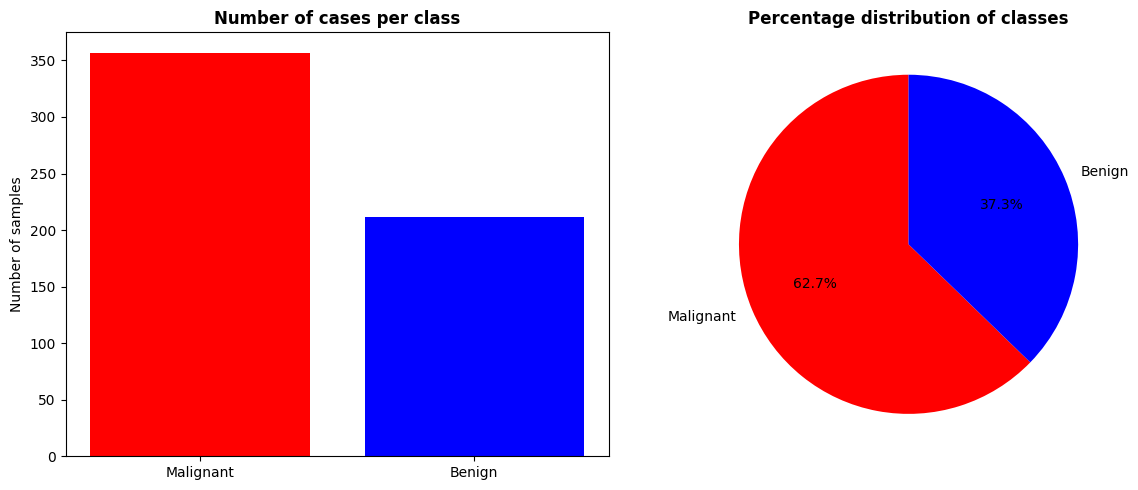

In [137]:
plt.figure(figsize=(12,5))
colors = ["red", "blue"]
plt.subplot(1, 2, 1)
plt.bar(['Malignant', 'Benign'],
        [np.sum(y==1), np.sum(y==0)],
        color = colors)
plt.title("Number of cases per class", fontsize=12, fontweight="bold")
plt.ylabel("Number of samples")

plt.subplot(1, 2, 2)
plt.pie([np.sum(y==1), np.sum(y==0)],
        labels=['Malignant', 'Benign'],
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Percentage distribution of classes", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

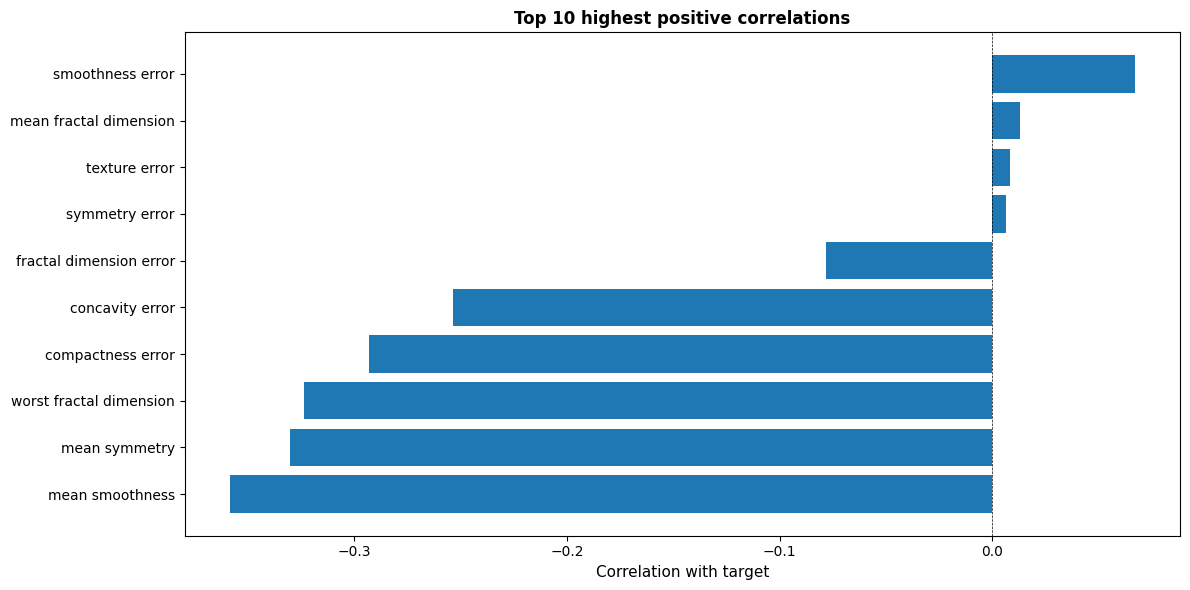

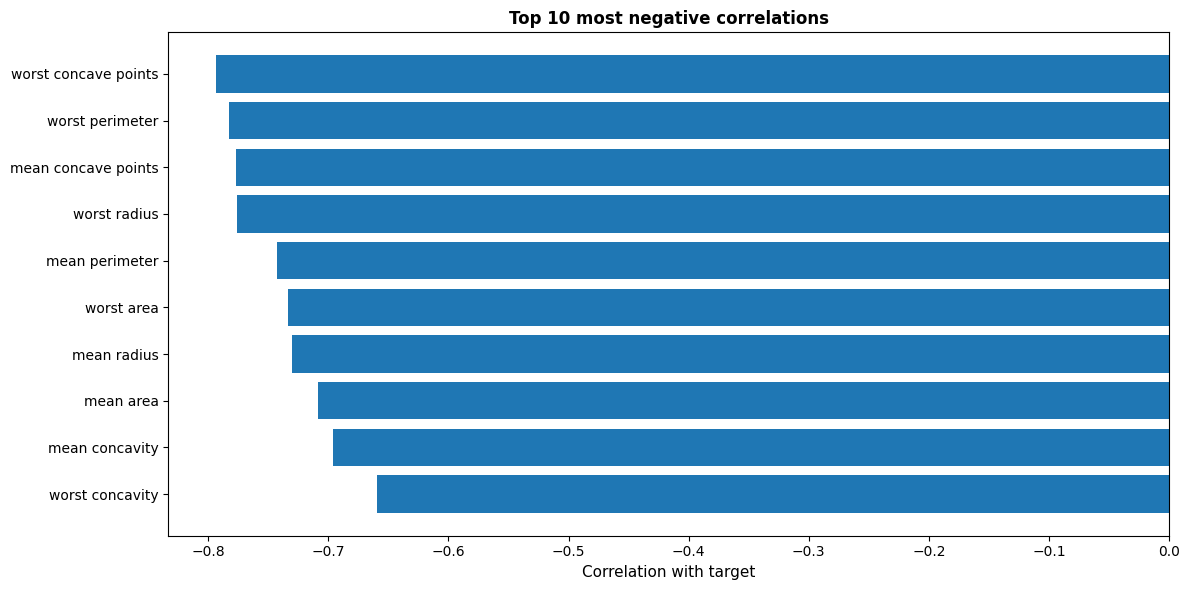

In [138]:
corrs = df[feature_names].corrwith(df['target'])
top = corrs.nlargest(10)
bottom = corrs.nsmallest(10)
best = corrs.loc[top.index].sort_values()
worst = corrs.loc[bottom.index][::-1]

plt.figure(figsize=(12, 6))
plt.barh(best.index, best.values)
plt.xlabel('Correlation with target', fontsize=11)
plt.title('Top 10 highest positive correlations', fontsize=12, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(worst.index, worst.values)
plt.xlabel('Correlation with target', fontsize=11)
plt.title('Top 10 most negative correlations', fontsize=12, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [139]:
corr_dict = dict(zip(feature_names, corrs))
sorted_corr = sorted(corr_dict.items(), key=lambda x: abs(x[1]), reverse=True)
for i, (feature, corr) in enumerate(sorted_corr[:5], 1):
  print(f"{i}. {feature}: {corr:.3f}")

1. worst concave points: -0.794
2. worst perimeter: -0.783
3. mean concave points: -0.777
4. worst radius: -0.776
5. mean perimeter: -0.743


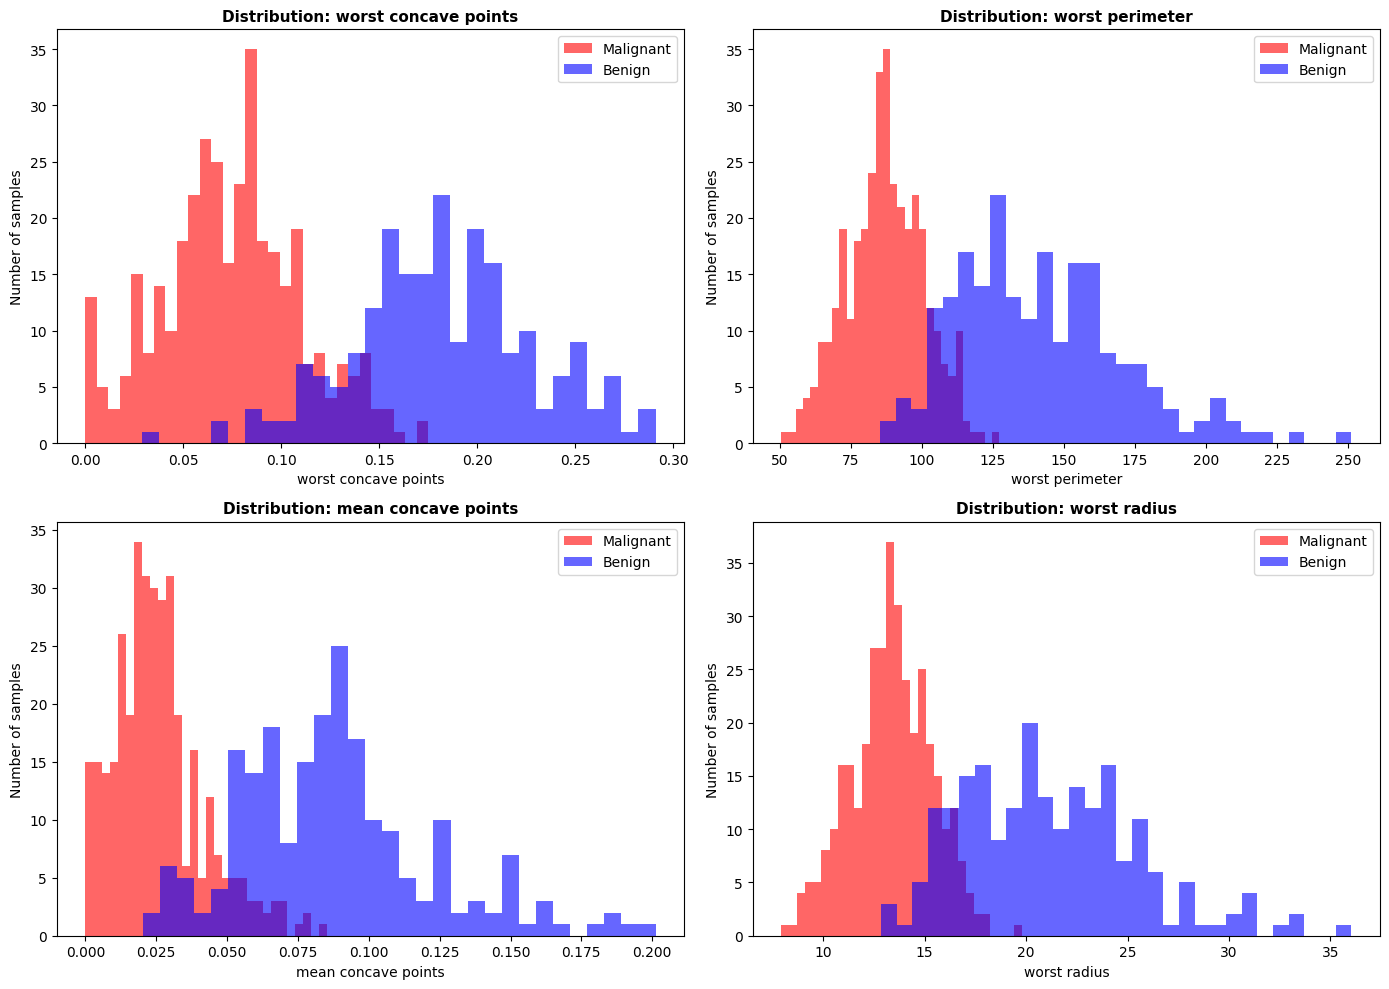

In [140]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))
important_features = ['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius']

for idx, feature in enumerate(important_features):
  ax = axes[idx // 2, idx % 2]
  malignant_data = df[df['target']==1][feature]
  benign_data = df[df['target']==0][feature]

  ax.hist(malignant_data, bins=30, alpha=0.6, label='Malignant', color='red')
  ax.hist(benign_data, bins=30, alpha=0.6, label='Benign', color='blue')

  ax.set_xlabel(feature, fontsize=10)
  ax.set_ylabel('Number of samples', fontsize=10)
  ax.set_title(f'Distribution: {feature}', fontsize=11, fontweight='bold')
  ax.legend()

plt.tight_layout()
plt.show()

In [141]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/X.shape[0]*100:.0f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]*100:.0f}%)")
print(f"\nClass distribution in training set:")
print(f"  Malignant: {np.sum(y_train == 1)} ({np.sum(y_train == 1)/len(y_train)*100:.1f}%)")
print(f"  Benign: {np.sum(y_train == 0)} ({np.sum(y_train == 0)/len(y_train)*100:.1f}%)")
print(f"\nClass distribution in test set:")
print(f"  Malignant: {np.sum(y_test == 1)} ({np.sum(y_test == 1)/len(y_test)*100:.1f}%)")
print(f"  Benign: {np.sum(y_test == 0)} ({np.sum(y_test == 0)/len(y_test)*100:.1f}%)")

Training set size: 455 samples (80%)
Test set size: 114 samples (20%)

Class distribution in training set:
  Malignant: 285 (62.6%)
  Benign: 170 (37.4%)

Class distribution in test set:
  Malignant: 72 (63.2%)
  Benign: 42 (36.8%)


In [142]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"  BEFORE standardization:")
print(f"    Mean: {X_train[:, 0].mean():.2f}")
print(f"    Std dev: {X_train[:, 0].std():.2f}")
print(f"    Min: {X_train[:, 0].min():.2f}, Max: {X_train[:, 0].max():.2f}")
print(f"\n  AFTER standardization:")
print(f"    Mean: {X_train_scaled[:, 0].mean():.2f}")
print(f"    Std dev: {X_train_scaled[:, 0].std():.2f}")
print(f"    Min: {X_train_scaled[:, 0].min():.2f}, Max: {X_train_scaled[:, 0].max():.2f}")

  BEFORE standardization:
    Mean: 14.07
    Std dev: 3.50
    Min: 6.98, Max: 28.11

  AFTER standardization:
    Mean: -0.00
    Std dev: 1.00
    Min: -2.03, Max: 4.02


# **Logistic Regression**

In [143]:
logreg = LogisticRegression(random_state=42, max_iter=10000)
logreg.fit(X_train_scaled, y_train)

print("Model trained")
print("\nModel parameters:")
print(f"Intercept (bias term): {logreg.intercept_[0]:.4f}")
print(f"Number of coefficients (weights): {len(logreg.coef_[0])}")

coef_abs = np.abs(logreg.coef_[0])
top_10_idx = np.argsort(coef_abs)[-10:]

for idx in reversed(top_10_idx):
  coef_val = logreg.coef_[0][idx]
  direction = "-> Malignant" if coef_val > 0 else "-> Benign"
  print(f"{feature_names[idx]:25s}: {coef_val:7.4f} {direction}")

y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]



Model trained

Model parameters:
Intercept (bias term): 0.3022
Number of coefficients (weights): 30
worst texture            : -1.2551 -> Benign
radius error             : -1.0830 -> Benign
worst concave points     : -0.9537 -> Benign
worst area               : -0.9478 -> Benign
worst radius             : -0.9476 -> Benign
worst symmetry           : -0.9392 -> Benign
area error               : -0.9291 -> Benign
worst concavity          : -0.8232 -> Benign
worst perimeter          : -0.7632 -> Benign
worst smoothness         : -0.7466 -> Benign


In [144]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}")

print(f"\nModel correctly classifies {accuracy*100:.1f}% of cases")
print(f"Of predicted as malignant, {precision*100:.1f}% are actually malignant")
print(f"Of actual malignant cases, model detects {recall*100:.1f}%")

Accuracy:  0.9825 (98.25%)
Precision: 0.9861 (98.61%)
Recall:    0.9861 (98.61%)
F1-Score:  0.9861
AUC:       0.9954

Model correctly classifies 98.2% of cases
Of predicted as malignant, 98.6% are actually malignant
Of actual malignant cases, model detects 98.6%


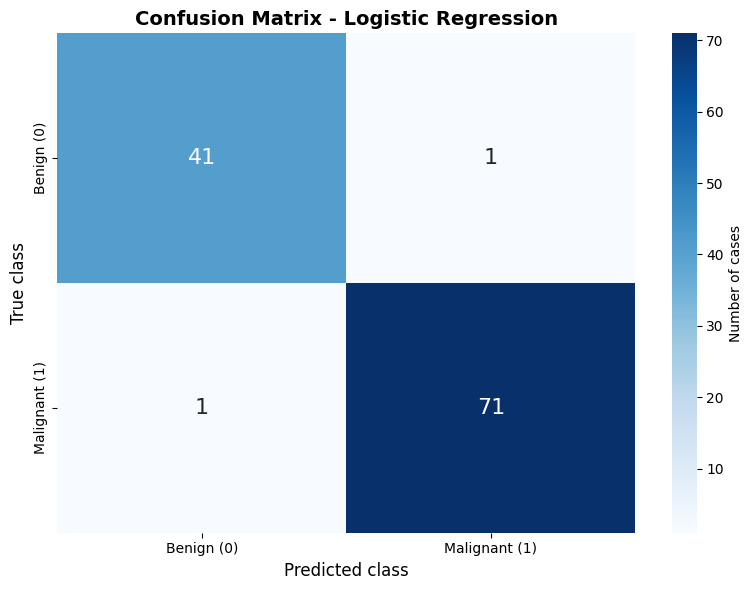

True Negatives (TN):    41 - Correctly identified BENIGN
False Positives (FP):    1 - Benign wrongly as MALIGNANT (false alarm)
False Negatives (FN):    1 - Malignant wrongly as BENIGN (missed cancer) ⚠️
True Positives (TP):    71 - Correctly identified MALIGNANT


In [145]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'],
            cbar_kws={'label': 'Number of cases'},
            annot_kws={'size': 16})

plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('True class', fontsize=12)
plt.xlabel('Predicted class', fontsize=12)
plt.tight_layout()
plt.show()

print(f"True Negatives (TN):   {tn:3d} - Correctly identified BENIGN")
print(f"False Positives (FP):  {fp:3d} - Benign wrongly as MALIGNANT (false alarm)")
print(f"False Negatives (FN):  {fn:3d} - Malignant wrongly as BENIGN (missed cancer) ⚠️")
print(f"True Positives (TP):   {tp:3d} - Correctly identified MALIGNANT")

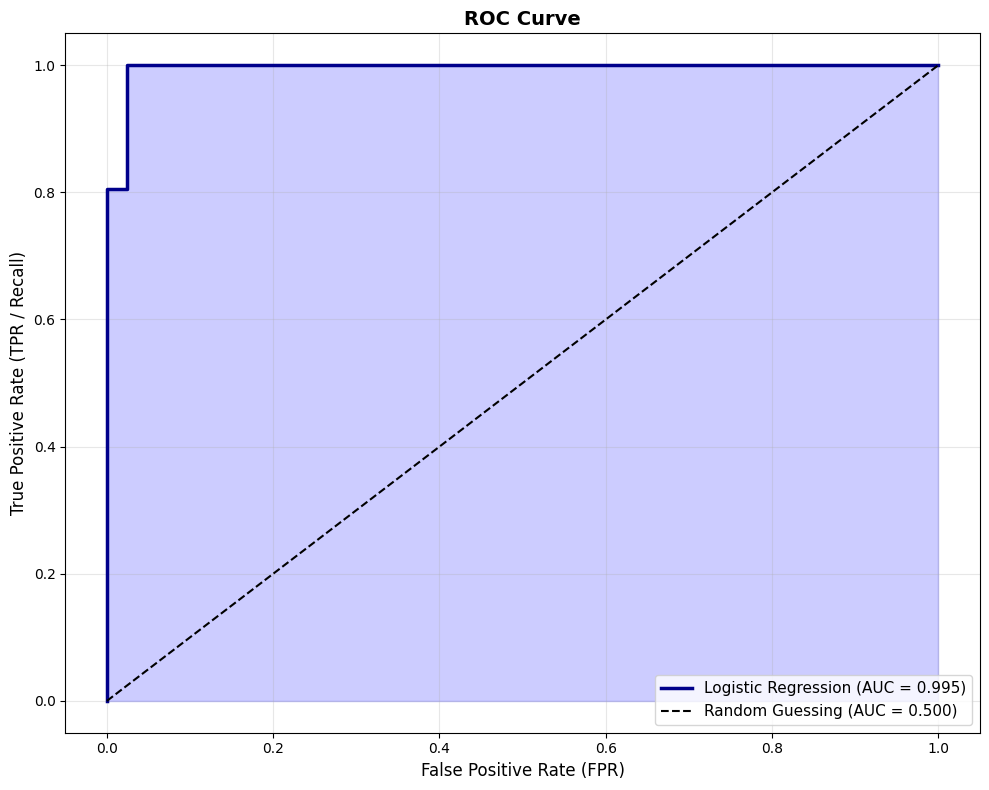

In [146]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.3f})",
         linewidth=2.5, color="darkblue")
plt.plot([0,1], [0,1], 'k--', label="Random Guessing (AUC = 0.500)", linewidth=1.5)
plt.fill_between(fpr, tpr, alpha=0.2, color="blue")

plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR / Recall)", fontsize=12)
plt.title("ROC Curve", fontsize=14, fontweight="bold")
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [147]:
print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)'],
                            digits=4))


               precision    recall  f1-score   support

   Benign (0)     0.9762    0.9762    0.9762        42
Malignant (1)     0.9861    0.9861    0.9861        72

     accuracy                         0.9825       114
    macro avg     0.9812    0.9812    0.9812       114
 weighted avg     0.9825    0.9825    0.9825       114



In [148]:
errors_idx = np.where(y_pred != y_test)[0]
print(f"Number of incorrect predictions: {len(errors_idx)} out of {len(y_test)} ({len(errors_idx)/len(y_test)*100:.1f}%)")

fp_idx = np.where((y_pred == 1) & (y_test == 0))[0]
fn_idx = np.where((y_pred ==0 ) & (y_test == 1))[0]

print(f"\nFalse Positives: {len(fp_idx)}")
print(f"False Negatives: {len(fn_idx)}")

if len(fn_idx) > 0:
    print(f"\n--- EXAMPLES OF FALSE NEGATIVES (most critical errors) ---")
    for i, idx in enumerate(fn_idx[:min(3, len(fn_idx))], 1):
        print(f"\nCase {i}:")
        print(f"True diagnosis:      MALIGNANT (cancer)")
        print(f"Predicted diagnosis: BENIGN (non-cancer)")
        print(f"Model confidence P(malignant): {y_pred_proba[idx]:.3f}")
        if y_pred_proba[idx] < 0.4:
            print(f"Model was very confident in wrong diagnosis")
        elif y_pred_proba[idx] < 0.5:
            print(f"Model was close to threshold 0.5 (borderline case)")

Number of incorrect predictions: 2 out of 114 (1.8%)

False Positives: 1
False Negatives: 1

--- EXAMPLES OF FALSE NEGATIVES (most critical errors) ---

Case 1:
True diagnosis:      MALIGNANT (cancer)
Predicted diagnosis: BENIGN (non-cancer)
Model confidence P(malignant): 0.366
Model was very confident in wrong diagnosis


# **Decision Tree**

In [149]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/X.shape[0]*100:.0f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]*100:.0f}%)")

#we don't need standardization for decision trees

Training set size: 455 samples (80%)
Test set size: 114 samples (20%)


In [150]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth = 4,
    min_samples_split = 20,
    min_samples_leaf = 10,
    random_state = 42
)

dt.fit(X_train, y_train)
print("Model trained successfully")
print(f"\nModel parameters:")
print(f"Max depth setting: {dt.max_depth}")
print(f"Actual tree depth: {dt.get_depth()}")
print(f"Number of leaves: {dt.get_n_leaves()}")
print(f"Total number of nodes: {dt.tree_.node_count}")

Model trained successfully

Model parameters:
Max depth setting: 4
Actual tree depth: 4
Number of leaves: 9
Total number of nodes: 17


In [151]:
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:,1]

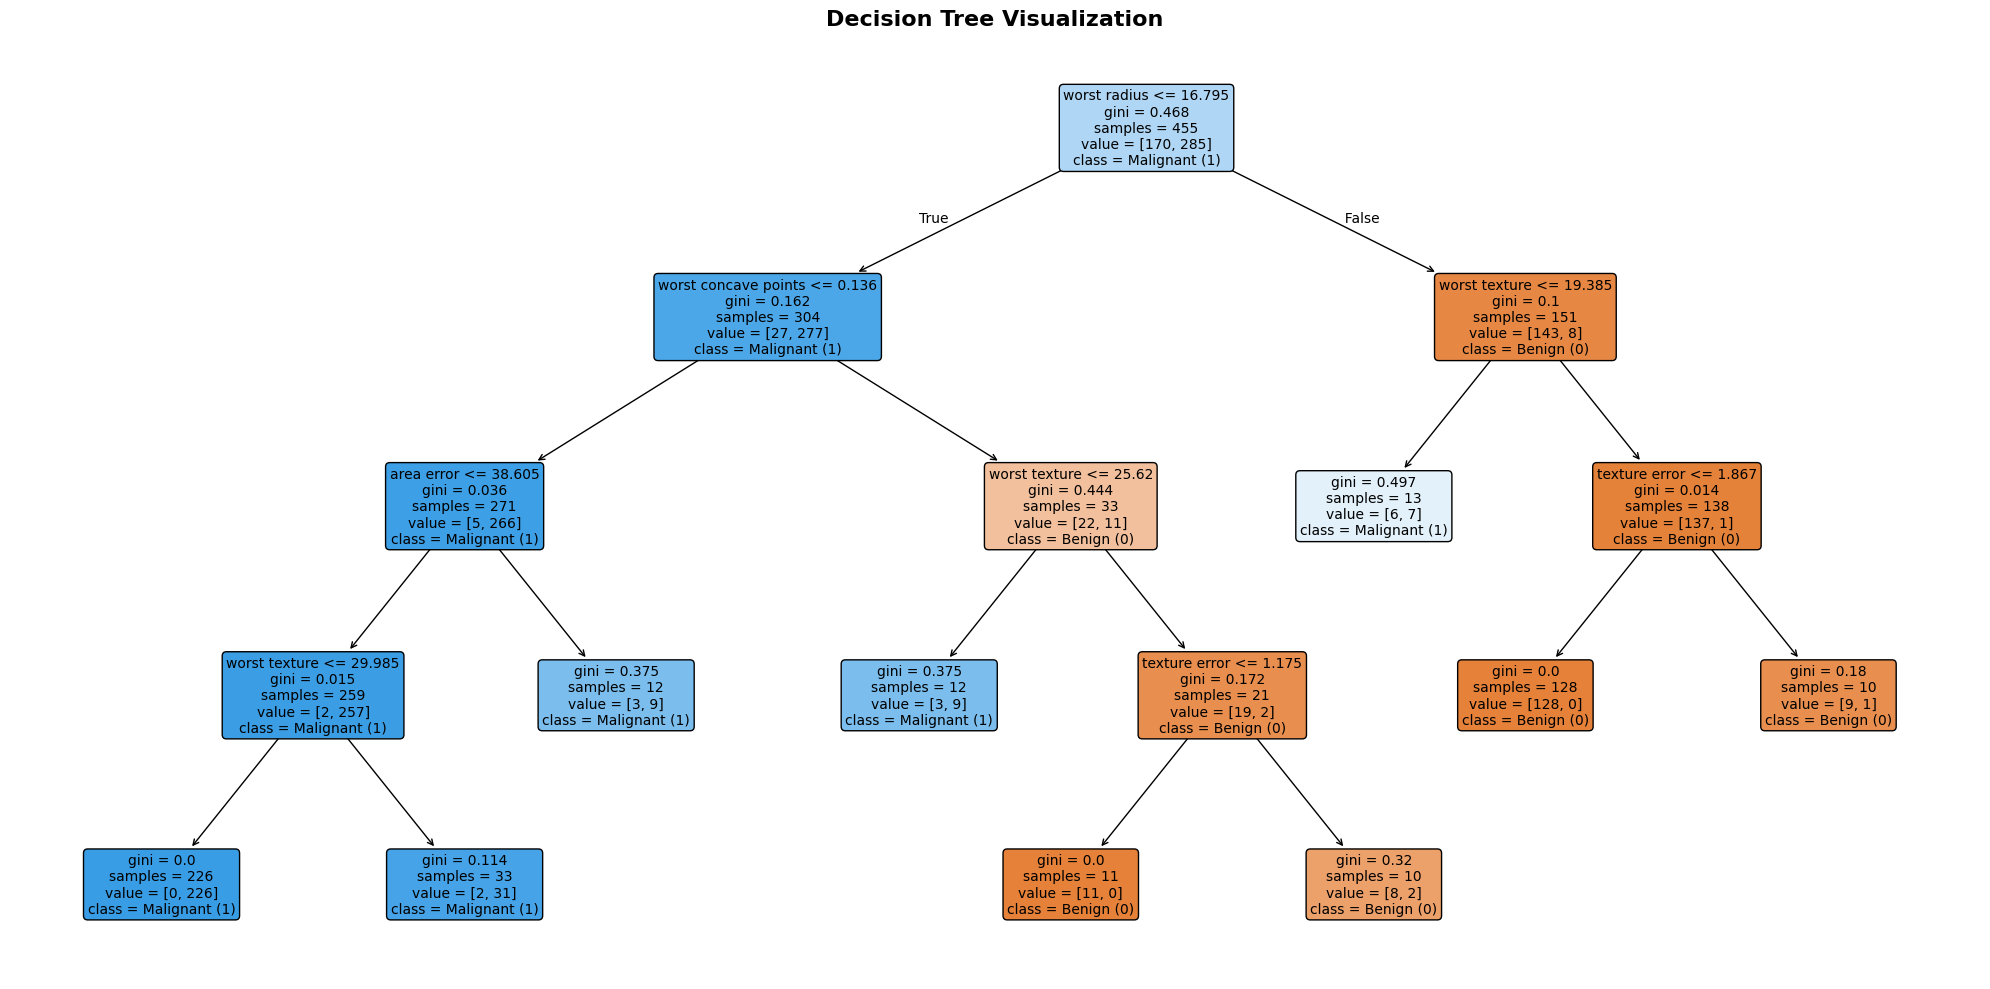

In [152]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt,
          feature_names=feature_names,
          class_names=['Benign (0)', 'Malignant (1)'],
          filled = True,
          rounded = True,
          fontsize = 10)
plt.title('Decision Tree Visualization', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Top 10 most important features
 1. worst radius                  : 0.7873505
 2. worst concave points          : 0.1309778
 3. worst texture                 : 0.0713355
 4. area error                    : 0.0071333
 5. texture error                 : 0.0032030
 6. worst concavity               : 0.0000000
 7. worst smoothness              : 0.0000000
 8. worst compactness             : 0.0000000
 9. worst perimeter               : 0.0000000
10. worst area                    : 0.0000000


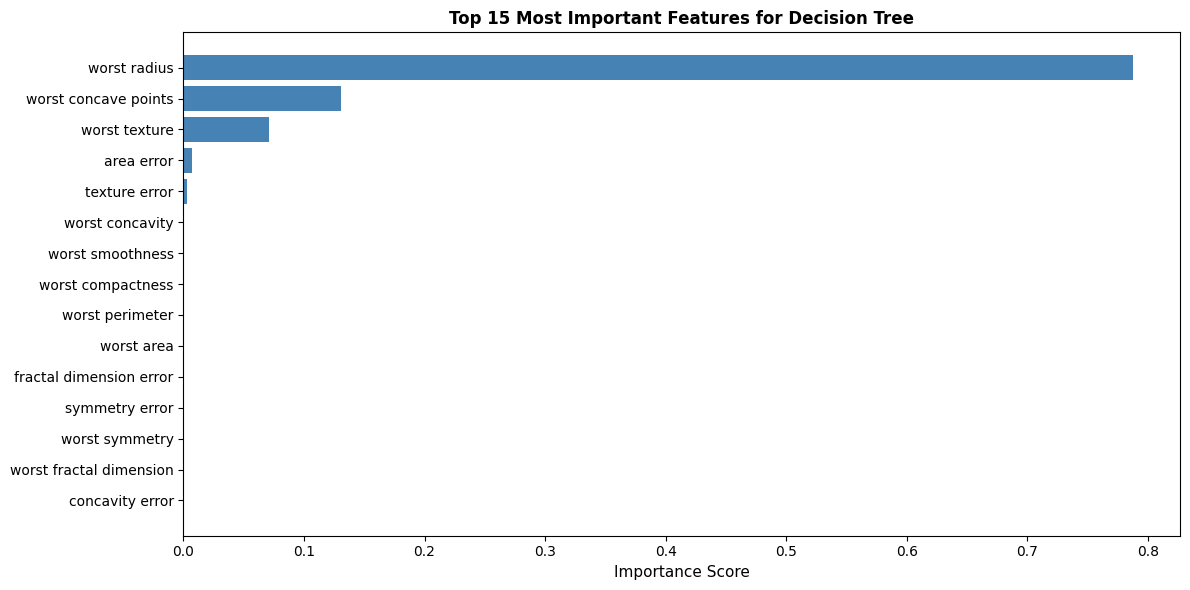

In [153]:
feature_importance = dt.feature_importances_
importance_idx = np.argsort(feature_importance)[::-1]
print("Top 10 most important features")
for i, idx in enumerate(importance_idx[:10], 1):
  print(f"{i:2d}. {feature_names[idx]:30s}: {feature_importance[idx]:.7f}")

plt.figure(figsize=(12,6))
top_15_idx = importance_idx[:15]
plt.barh(range(15), feature_importance[top_15_idx], color='steelblue')
plt.yticks(range(15), feature_names[top_15_idx])
plt.xlabel('Importance Score', fontsize=11)
plt.title('Top 15 Most Important Features for Decision Tree', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [154]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}")

print(f"\nModel correctly classifies {accuracy*100:.1f}% of cases")
print(f"Of predicted as malignant, {precision*100:.1f}% are actually malignant")
print(f"Of actual malignant cases, model detects {recall*100:.1f}%")

Accuracy:  0.9474 (94.74%)
Precision: 0.9583 (95.83%)
Recall:    0.9583 (95.83%)
F1-Score:  0.9583
AUC:       0.9679

Model correctly classifies 94.7% of cases
Of predicted as malignant, 95.8% are actually malignant
Of actual malignant cases, model detects 95.8%


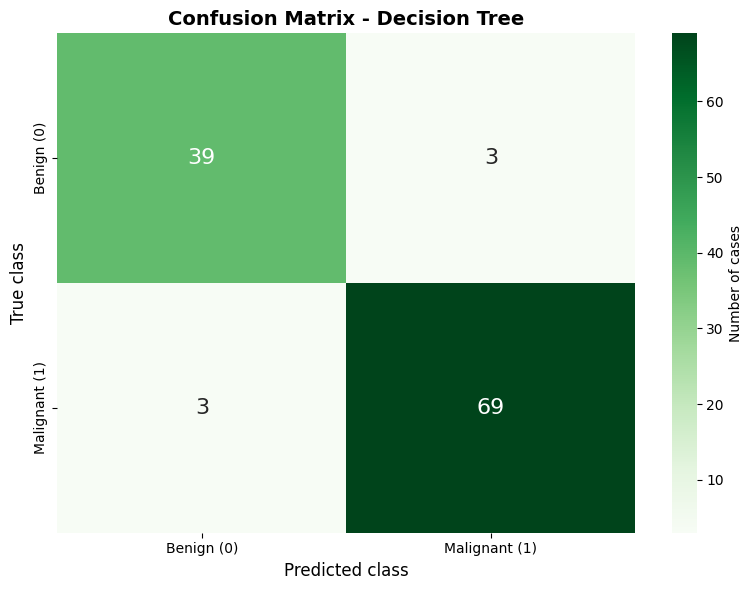


True Negatives (TN):    39 - Correctly identified BENIGN
False Positives (FP):    3 - Benign wrongly as MALIGNANT (false alarm)
False Negatives (FN):    3 - Malignant wrongly as BENIGN (missed cancer)
True Positives (TP):    69 - Correctly identified MALIGNANT


In [155]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'],
            cbar_kws={'label': 'Number of cases'},
            annot_kws={'size': 16})
plt.title('Confusion Matrix - Decision Tree', fontsize=14, fontweight='bold')
plt.ylabel('True class', fontsize=12)
plt.xlabel('Predicted class', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nTrue Negatives (TN):   {tn:3d} - Correctly identified BENIGN")
print(f"False Positives (FP):  {fp:3d} - Benign wrongly as MALIGNANT (false alarm)")
print(f"False Negatives (FN):  {fn:3d} - Malignant wrongly as BENIGN (missed cancer)")
print(f"True Positives (TP):   {tp:3d} - Correctly identified MALIGNANT")

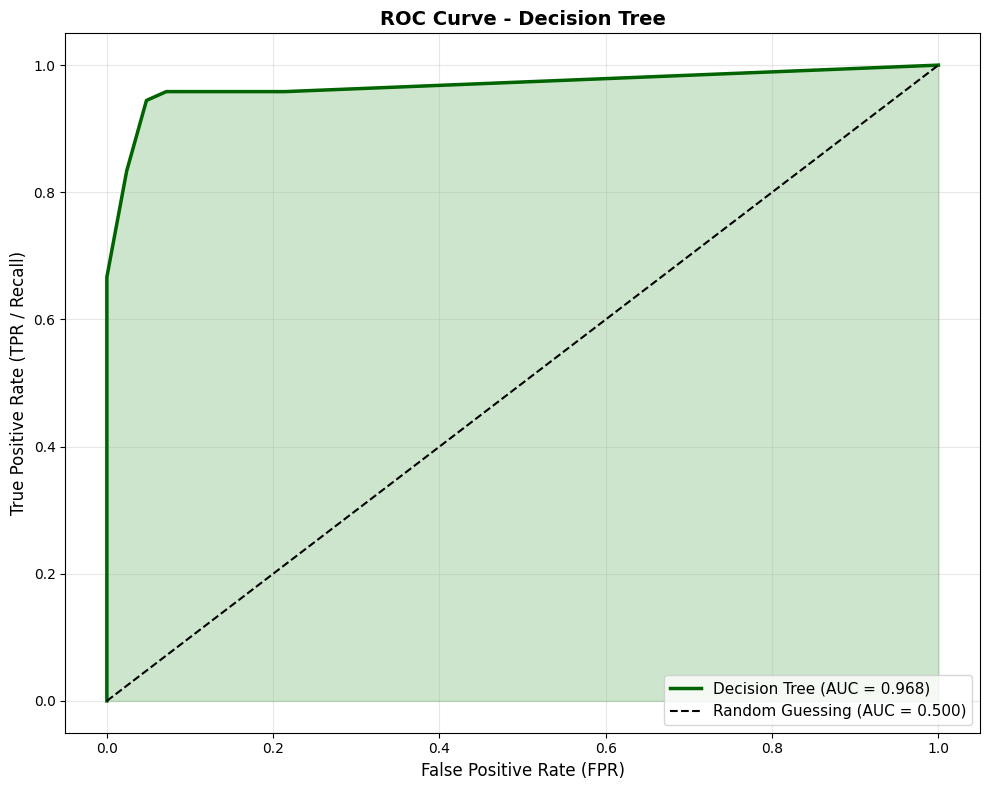

In [156]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc:.3f})',
         linewidth=2.5, color='darkgreen')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.500)', linewidth=1.5)
plt.fill_between(fpr, tpr, alpha=0.2, color='green')

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR / Recall)', fontsize=12)
plt.title('ROC Curve - Decision Tree', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# **Random Forest**

In [157]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/X.shape[0]*100:.0f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]*100:.0f}%)")

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
print("Model trained successfully")
print(f"\nModel parameters:")
print(f"Number of trees (n_estimators): {rf.n_estimators}")
print(f"Max depth per tree: {rf.max_depth}")
print(f"Max features per split: {rf.max_features}")
print(f"Out-of-bag score: {rf.oob_score if hasattr(rf, 'oob_score_') else 'Not calculated'}")

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]

Training set size: 455 samples (80%)
Test set size: 114 samples (20%)
Model trained successfully

Model parameters:
Number of trees (n_estimators): 100
Max depth per tree: 10
Max features per split: sqrt
Out-of-bag score: Not calculated


Top 10 most important features:
 1. worst area                    : 0.1461
 2. worst concave points          : 0.1300
 3. worst radius                  : 0.1002
 4. mean concave points           : 0.0929
 5. mean perimeter                : 0.0759
 6. worst perimeter               : 0.0713
 7. mean radius                   : 0.0696
 8. mean concavity                : 0.0602
 9. mean area                     : 0.0514
10. area error                    : 0.0337


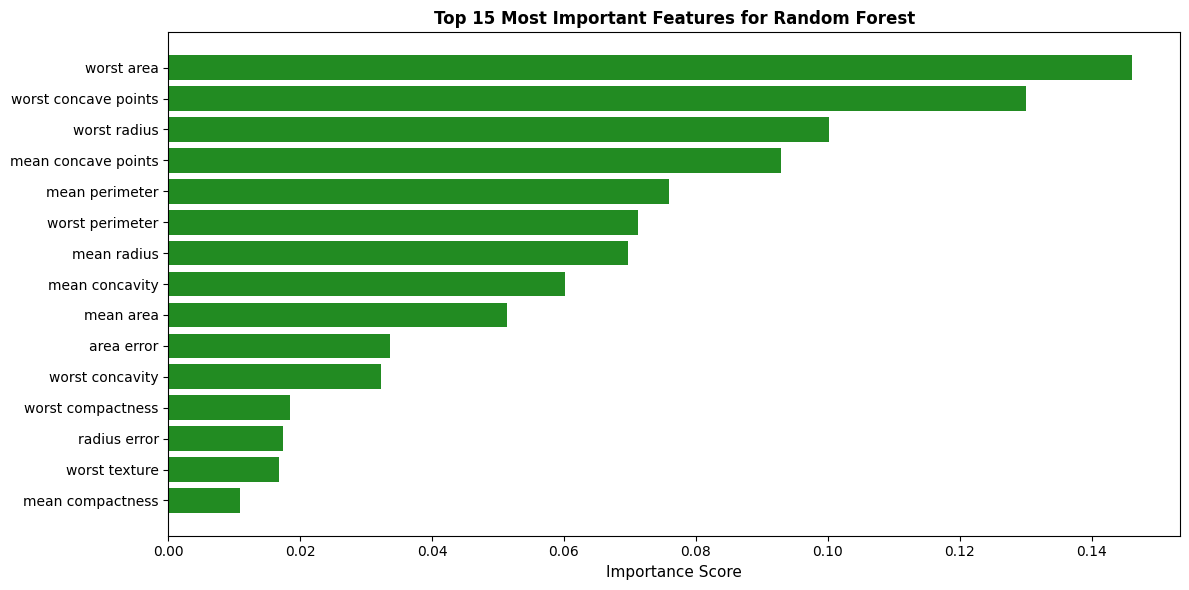

In [158]:
feature_importance = rf.feature_importances_
importance_idx = np.argsort(feature_importance)[::-1]

print("Top 10 most important features:")
for i, idx in enumerate(importance_idx[:10], 1):
    print(f"{i:2d}. {feature_names[idx]:30s}: {feature_importance[idx]:.4f}")

plt.figure(figsize=(12, 6))
top_15_idx = importance_idx[:15]
plt.barh(range(15), feature_importance[top_15_idx], color='forestgreen')
plt.yticks(range(15), feature_names[top_15_idx])
plt.xlabel('Importance Score', fontsize=11)
plt.title('Top 15 Most Important Features for Random Forest', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [159]:
sample_trees = [0, 25, 50, 75, 99]

for tree_idx in sample_trees:
    tree = rf.estimators_[tree_idx]
    print(f"Tree {tree_idx}:")
    print(f"  Depth: {tree.get_depth()}")
    print(f"  Leaves: {tree.get_n_leaves()}")
    print(f"  Train accuracy: {tree.score(X_train, y_train):.4f}")
    print(f"  Test accuracy: {tree.score(X_test, y_test):.4f}")

Tree 0:
  Depth: 7
  Leaves: 17
  Train accuracy: 0.9538
  Test accuracy: 0.9298
Tree 25:
  Depth: 5
  Leaves: 13
  Train accuracy: 0.9648
  Test accuracy: 0.9298
Tree 50:
  Depth: 5
  Leaves: 9
  Train accuracy: 0.9516
  Test accuracy: 0.9386
Tree 75:
  Depth: 6
  Leaves: 17
  Train accuracy: 0.9648
  Test accuracy: 0.9298
Tree 99:
  Depth: 6
  Leaves: 16
  Train accuracy: 0.9648
  Test accuracy: 0.9386


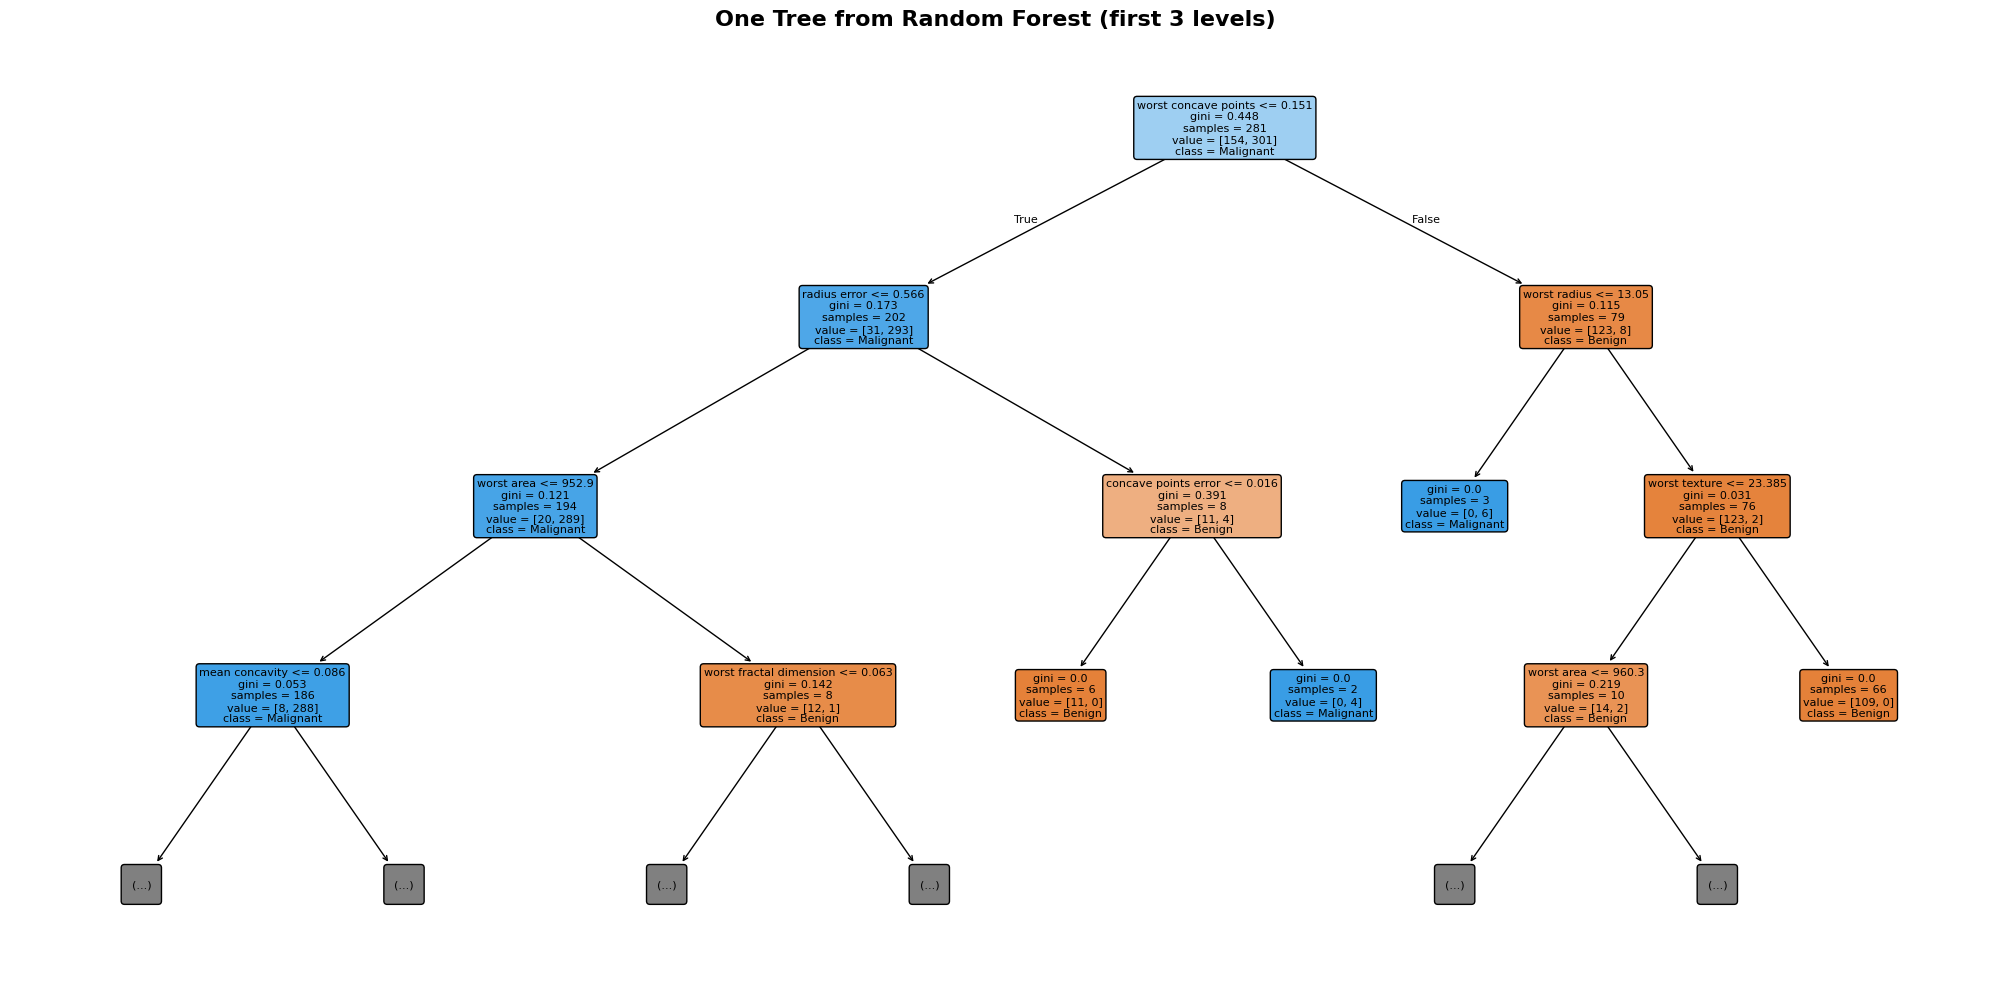

In [160]:
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0],
          feature_names=feature_names,
          class_names=['Benign', 'Malignant'],
          filled=True,
          rounded=True,
          fontsize=8,
          max_depth=3)
plt.title('One Tree from Random Forest (first 3 levels)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [161]:
sample_idx = 0
sample = X_test[sample_idx].reshape(1, -1)

tree_predictions = np.array([tree.predict(sample)[0] for tree in rf.estimators_])

votes_benign = np.sum(tree_predictions == 0)
votes_malignant = np.sum(tree_predictions == 1)

print(f"Patient #{sample_idx}:")
print(f"  True diagnosis: {'MALIGNANT' if y_test[sample_idx] == 1 else 'BENIGN'}")
print(f"\nVoting results from 100 trees:")
print(f"  Votes for BENIGN:    {votes_benign:3d} trees ({votes_benign/100*100:.1f}%)")
print(f"  Votes for MALIGNANT: {votes_malignant:3d} trees ({votes_malignant/100*100:.1f}%)")
print(f"\nFinal prediction: {'MALIGNANT' if votes_malignant > votes_benign else 'BENIGN'}")
print(f"Confidence (probability): {max(votes_benign, votes_malignant)/100:.3f}")

Patient #0:
  True diagnosis: BENIGN

Voting results from 100 trees:
  Votes for BENIGN:    100 trees (100.0%)
  Votes for MALIGNANT:   0 trees (0.0%)

Final prediction: BENIGN
Confidence (probability): 1.000


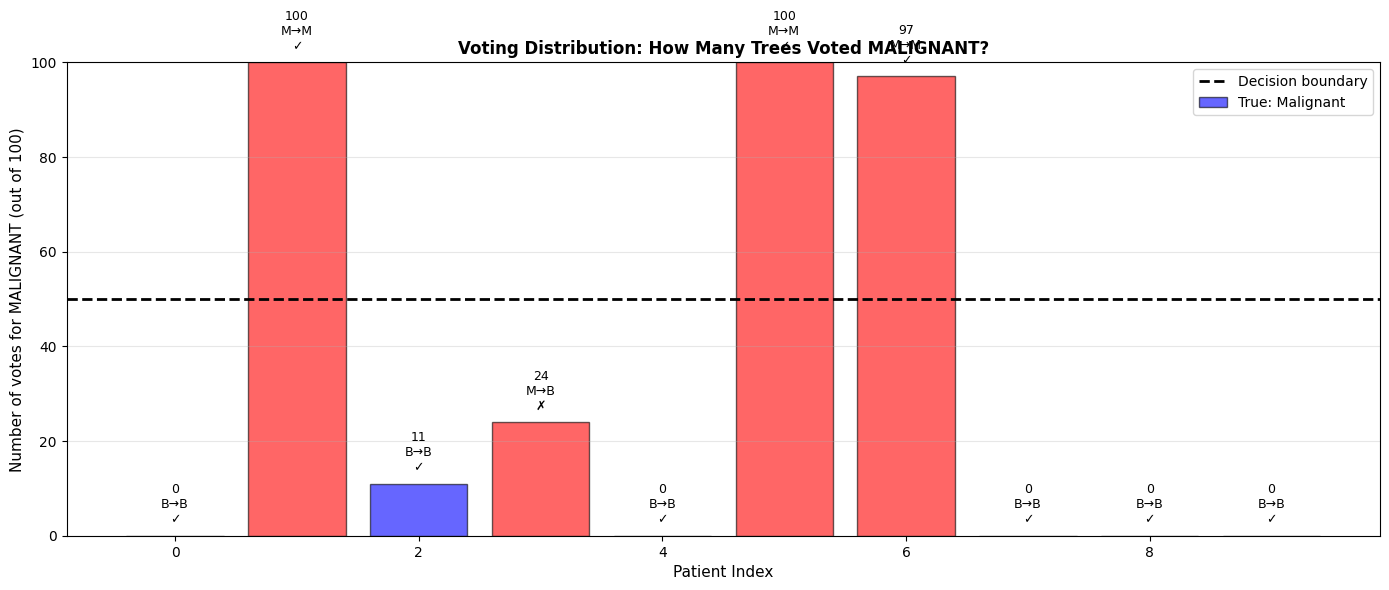

In [162]:
fig, ax = plt.subplots(figsize=(14, 6))

votes_data = []
for i in range(10):
    sample = X_test[i].reshape(1, -1)
    tree_preds = np.array([tree.predict(sample)[0] for tree in rf.estimators_])
    votes_malignant = np.sum(tree_preds == 1)
    votes_data.append(votes_malignant)

colors = ['red' if y_test[i] == 1 else 'blue' for i in range(10)]
bars = ax.bar(range(10), votes_data, color=colors, alpha=0.6, edgecolor='black')

ax.axhline(y=50, color='black', linestyle='--', linewidth=2, label='Decision boundary (50 votes)')
ax.set_xlabel('Patient Index', fontsize=11)
ax.set_ylabel('Number of votes for MALIGNANT (out of 100)', fontsize=11)
ax.set_title('Voting Distribution: How Many Trees Voted MALIGNANT?', fontsize=12, fontweight='bold')
ax.set_ylim([0, 100])
ax.legend(['Decision boundary', 'True: Malignant', 'True: Benign'])
ax.grid(axis='y', alpha=0.3)

# Add text labels
for i, (bar, votes) in enumerate(zip(bars, votes_data)):
    height = bar.get_height()
    true_label = 'M' if y_test[i] == 1 else 'B'
    pred_label = 'M' if votes > 50 else 'B'
    correct = '✓' if true_label == pred_label else '✗'
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{votes}\n{true_label}→{pred_label}\n{correct}',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [163]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}")

Accuracy:  0.9561 (95.61%)
Precision: 0.9589 (95.89%)
Recall:    0.9722 (97.22%)
F1-Score:  0.9655
AUC:       0.9934


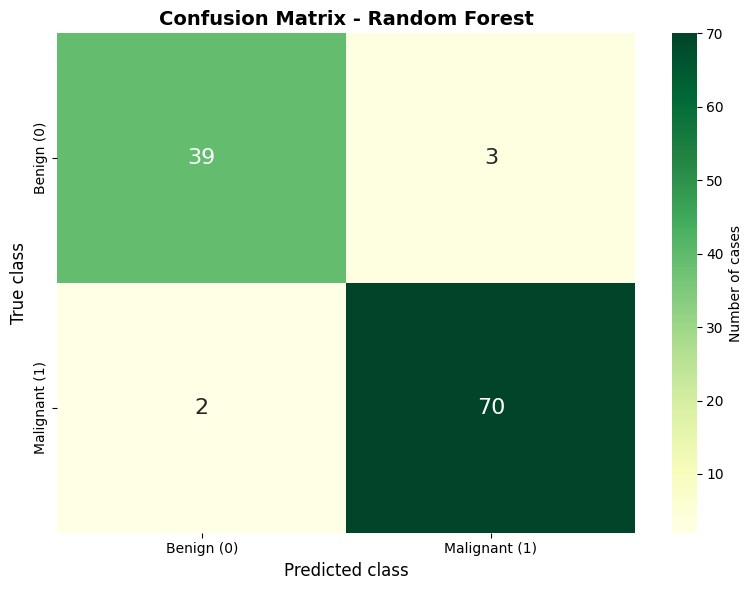


True Negatives (TN):    39 - Correctly identified BENIGN
False Positives (FP):    3 - Benign wrongly as MALIGNANT (false alarm)
False Negatives (FN):    2 - Malignant wrongly as BENIGN (missed cancer) ⚠️
True Positives (TP):    70 - Correctly identified MALIGNANT


In [164]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'],
            cbar_kws={'label': 'Number of cases'},
            annot_kws={'size': 16})
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('True class', fontsize=12)
plt.xlabel('Predicted class', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nTrue Negatives (TN):   {tn:3d} - Correctly identified BENIGN")
print(f"False Positives (FP):  {fp:3d} - Benign wrongly as MALIGNANT (false alarm)")
print(f"False Negatives (FN):  {fn:3d} - Malignant wrongly as BENIGN (missed cancer) ⚠️")
print(f"True Positives (TP):   {tp:3d} - Correctly identified MALIGNANT")

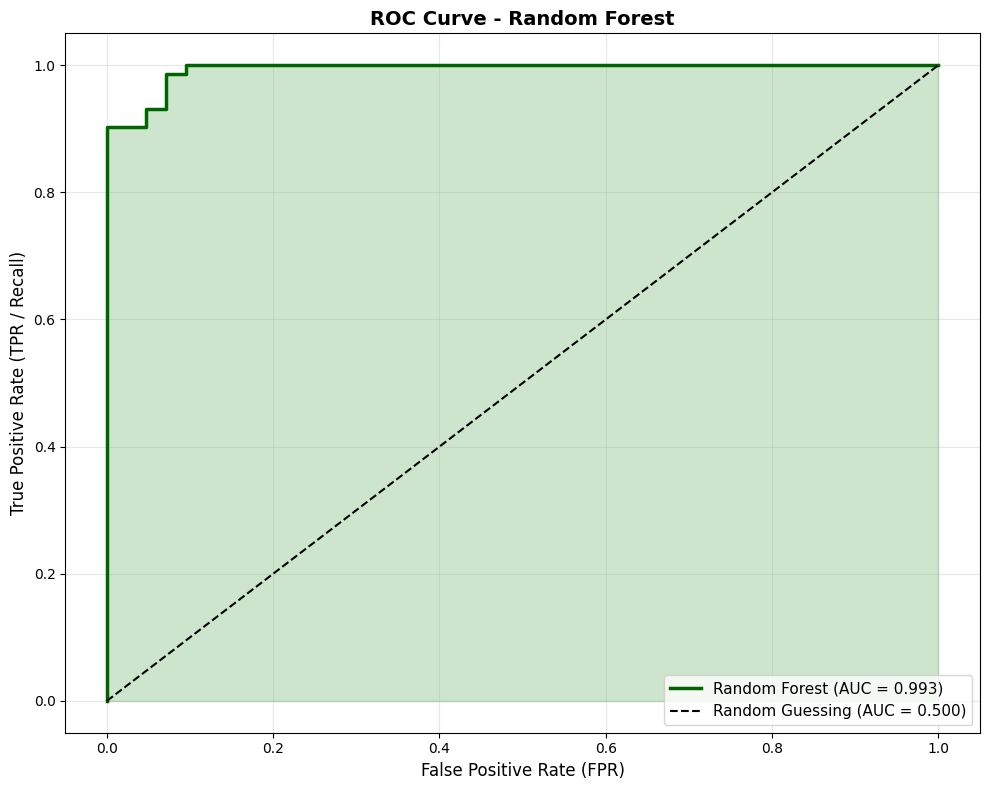

In [165]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.3f})',
         linewidth=2.5, color='darkgreen')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.500)', linewidth=1.5)
plt.fill_between(fpr, tpr, alpha=0.2, color='green')

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR / Recall)', fontsize=12)
plt.title('ROC Curve - Random Forest', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [166]:
print(classification_report(y_test, y_pred,
                          target_names=['Benign (0)', 'Malignant (1)'],
                          digits=4))


               precision    recall  f1-score   support

   Benign (0)     0.9512    0.9286    0.9398        42
Malignant (1)     0.9589    0.9722    0.9655        72

     accuracy                         0.9561       114
    macro avg     0.9551    0.9504    0.9526       114
 weighted avg     0.9561    0.9561    0.9560       114



In [167]:
n_trees_list = [1, 5, 10, 20, 50, 100, 200, 300, 500, 1000, 2000, 2500]
train_scores = []
test_scores = []

for n_trees in n_trees_list:
    rf_temp = RandomForestClassifier(n_estimators=n_trees, max_depth=10, random_state=42, n_jobs=-1)
    rf_temp.fit(X_train, y_train)

    train_score = rf_temp.score(X_train, y_train)
    test_score = rf_temp.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

    print(f"  n_estimators={n_trees:3d}: Train accuracy = {train_score:.4f}, Test accuracy = {test_score:.4f}")

  n_estimators=  1: Train accuracy = 0.9714, Test accuracy = 0.9474
  n_estimators=  5: Train accuracy = 0.9912, Test accuracy = 0.9386
  n_estimators= 10: Train accuracy = 0.9956, Test accuracy = 0.9386
  n_estimators= 20: Train accuracy = 1.0000, Test accuracy = 0.9561
  n_estimators= 50: Train accuracy = 1.0000, Test accuracy = 0.9561
  n_estimators=100: Train accuracy = 1.0000, Test accuracy = 0.9561
  n_estimators=200: Train accuracy = 1.0000, Test accuracy = 0.9561
  n_estimators=300: Train accuracy = 1.0000, Test accuracy = 0.9474
  n_estimators=500: Train accuracy = 1.0000, Test accuracy = 0.9561
  n_estimators=1000: Train accuracy = 1.0000, Test accuracy = 0.9561
  n_estimators=2000: Train accuracy = 1.0000, Test accuracy = 0.9561
  n_estimators=2500: Train accuracy = 1.0000, Test accuracy = 0.9561


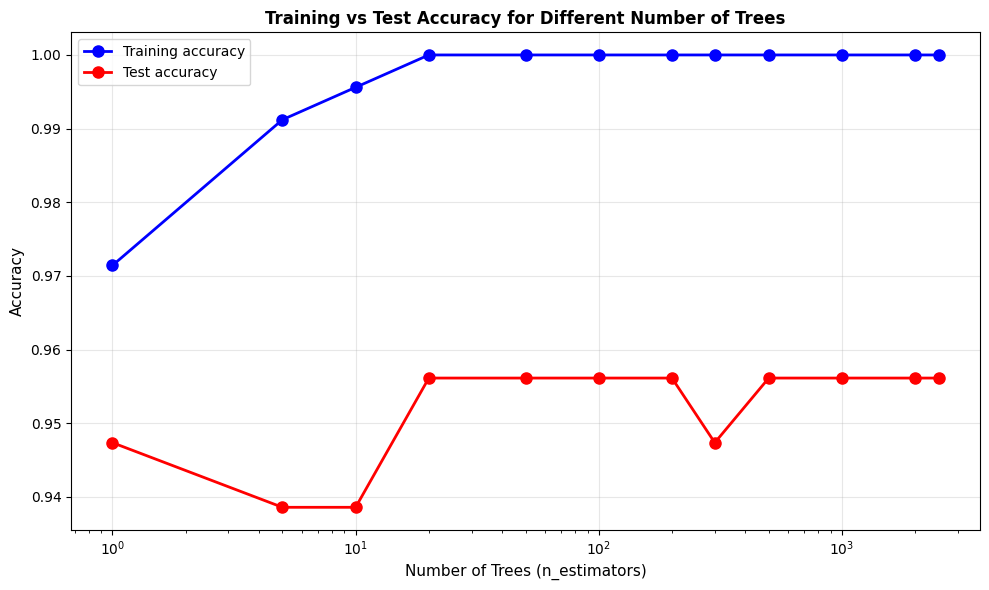

In [168]:
plt.figure(figsize=(10, 6))
plt.plot(n_trees_list, train_scores, 'o-', linewidth=2, markersize=8, label='Training accuracy', color='blue')
plt.plot(n_trees_list, test_scores, 'o-', linewidth=2, markersize=8, label='Test accuracy', color='red')

plt.xlabel('Number of Trees (n_estimators)', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.title('Training vs Test Accuracy for Different Number of Trees', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xscale('log')
plt.tight_layout()
plt.show()

In [169]:
rf_oob = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    oob_score=True,
    n_jobs=-1
)

rf_oob.fit(X_train, y_train)
print(f"OOB Score: {rf_oob.oob_score_:.4f}")
print(f"Test Score: {rf_oob.score(X_test, y_test):.4f}")

OOB Score: 0.9538
Test Score: 0.9561


# **K-Nearest Neighbors (KNN)**

In [170]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"  BEFORE: mean={X_train[:, 0].mean():.2f}, std={X_train[:, 0].std():.2f}")
print(f"  AFTER:  mean={X_train_scaled[:, 0].mean():.2f}, std={X_train_scaled[:, 0].std():.2f}")



  BEFORE: mean=14.07, std=3.50
  AFTER:  mean=-0.00, std=1.00


In [171]:
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    metric='euclidean',
    n_jobs=-1
)

knn.fit(X_train_scaled, y_train)
print(f"Model parameters:")
print(f"Number of neighbors (K): {knn.n_neighbors}")
print(f"Distance metric: {knn.metric}")
print(f"Weight function: {knn.weights}")
print(f"Training samples stored: {X_train_scaled.shape[0]}")

y_pred = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]

Model parameters:
Number of neighbors (K): 5
Distance metric: euclidean
Weight function: uniform
Training samples stored: 455


In [172]:
sample_idx = 0
sample = X_test_scaled[sample_idx].reshape(1, -1)

distances, indices = knn.kneighbors(sample, n_neighbors=5)

print(f"Patient #{sample_idx}:")
print(f"  True diagnosis: {'MALIGNANT' if y_test[sample_idx] == 1 else 'BENIGN'}")
print(f"\nFinding 5 nearest neighbors in training set:")
print()

votes_malignant = 0
votes_benign = 0

for i, (dist, idx) in enumerate(zip(distances[0], indices[0]), 1):
    neighbor_class = 'MALIGNANT' if y_train[idx] == 1 else 'BENIGN'
    if y_train[idx] == 1:
        votes_malignant += 1
    else:
        votes_benign += 1
    print(f"  Neighbor {i}: distance = {dist:.3f}, class = {neighbor_class}")

print(f"\nVoting results:")
print(f"  BENIGN:    {votes_benign} votes")
print(f"  MALIGNANT: {votes_malignant} votes")
print(f"\nFinal prediction: {'MALIGNANT' if votes_malignant > votes_benign else 'BENIGN'}")
print(f"Predicted probability: {votes_malignant / 5:.2f}")

Patient #0:
  True diagnosis: BENIGN

Finding 5 nearest neighbors in training set:

  Neighbor 1: distance = 3.101, class = BENIGN
  Neighbor 2: distance = 3.630, class = BENIGN
  Neighbor 3: distance = 3.724, class = BENIGN
  Neighbor 4: distance = 3.814, class = BENIGN
  Neighbor 5: distance = 3.897, class = BENIGN

Voting results:
  BENIGN:    5 votes
  MALIGNANT: 0 votes

Final prediction: BENIGN
Predicted probability: 0.00


In [173]:
sample = X_test_scaled[0].reshape(1, -1)
all_distances = np.sqrt(np.sum((X_train_scaled - sample)**2, axis=1))

sorted_indices = np.argsort(all_distances)
sorted_distances = all_distances[sorted_indices]
sorted_classes = y_train[sorted_indices]

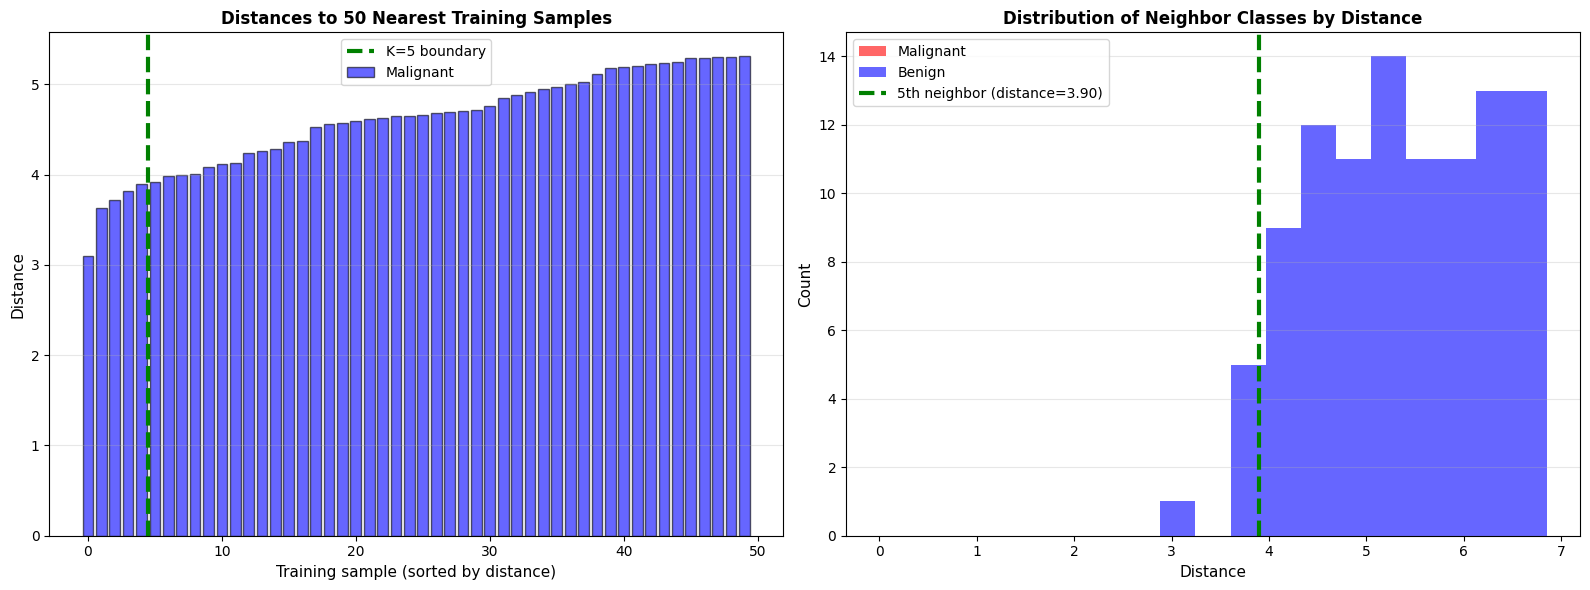

In [174]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors = ['red' if c == 1 else 'blue' for c in sorted_classes[:50]]
ax1.bar(range(50), sorted_distances[:50], color=colors, alpha=0.6, edgecolor='black')
ax1.axvline(x=4.5, color='green', linestyle='--', linewidth=3, label='K=5 boundary')
ax1.set_xlabel('Training sample (sorted by distance)', fontsize=11)
ax1.set_ylabel('Distance', fontsize=11)
ax1.set_title('Distances to 50 Nearest Training Samples', fontsize=12, fontweight='bold')
ax1.legend(['K=5 boundary', 'Malignant', 'Benign'], fontsize=10)
ax1.grid(axis='y', alpha=0.3)

bins = np.linspace(0, sorted_distances[:100].max(), 20)
malignant_distances = sorted_distances[sorted_classes == 1][:100]
benign_distances = sorted_distances[sorted_classes == 0][:100]

ax2.hist(malignant_distances, bins=bins, alpha=0.6, label='Malignant', color='red')
ax2.hist(benign_distances, bins=bins, alpha=0.6, label='Benign', color='blue')
ax2.axvline(x=sorted_distances[4], color='green', linestyle='--', linewidth=3,
            label=f'5th neighbor (distance={sorted_distances[4]:.2f})')
ax2.set_xlabel('Distance', fontsize=11)
ax2.set_ylabel('Count', fontsize=11)
ax2.set_title('Distribution of Neighbor Classes by Distance', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [175]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}")

print(f"\nModel correctly classifies {accuracy*100:.1f}% of cases")
print(f"Of predicted as malignant, {precision*100:.1f}% are actually malignant")
print(f"Of actual malignant cases, model detects {recall*100:.1f}%")

Accuracy:  0.9561 (95.61%)
Precision: 0.9589 (95.89%)
Recall:    0.9722 (97.22%)
F1-Score:  0.9655
AUC:       0.9788

Model correctly classifies 95.6% of cases
Of predicted as malignant, 95.9% are actually malignant
Of actual malignant cases, model detects 97.2%


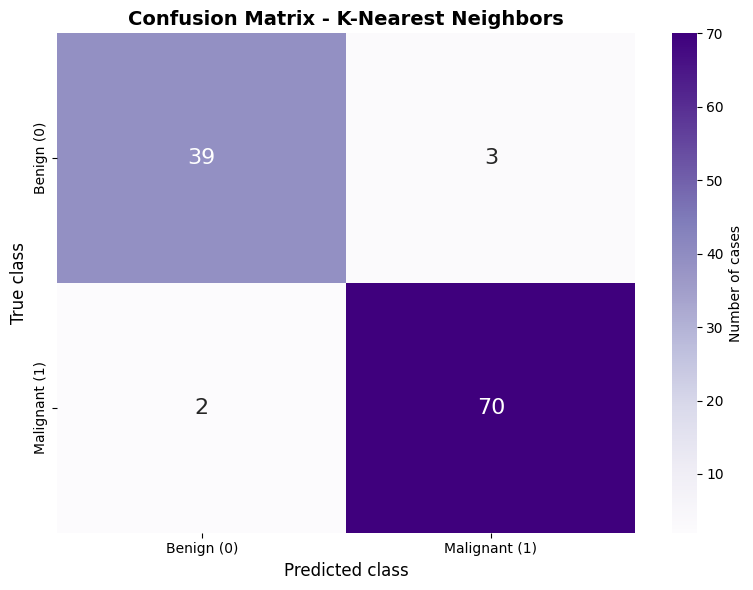


True Negatives (TN):    39 - Correctly identified BENIGN
False Positives (FP):    3 - Benign wrongly as MALIGNANT (false alarm)
False Negatives (FN):    2 - Malignant wrongly as BENIGN (missed cancer) ⚠️
True Positives (TP):    70 - Correctly identified MALIGNANT


In [176]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'],
            cbar_kws={'label': 'Number of cases'},
            annot_kws={'size': 16})
plt.title('Confusion Matrix - K-Nearest Neighbors', fontsize=14, fontweight='bold')
plt.ylabel('True class', fontsize=12)
plt.xlabel('Predicted class', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nTrue Negatives (TN):   {tn:3d} - Correctly identified BENIGN")
print(f"False Positives (FP):  {fp:3d} - Benign wrongly as MALIGNANT (false alarm)")
print(f"False Negatives (FN):  {fn:3d} - Malignant wrongly as BENIGN (missed cancer) ⚠️")
print(f"True Positives (TP):   {tp:3d} - Correctly identified MALIGNANT")

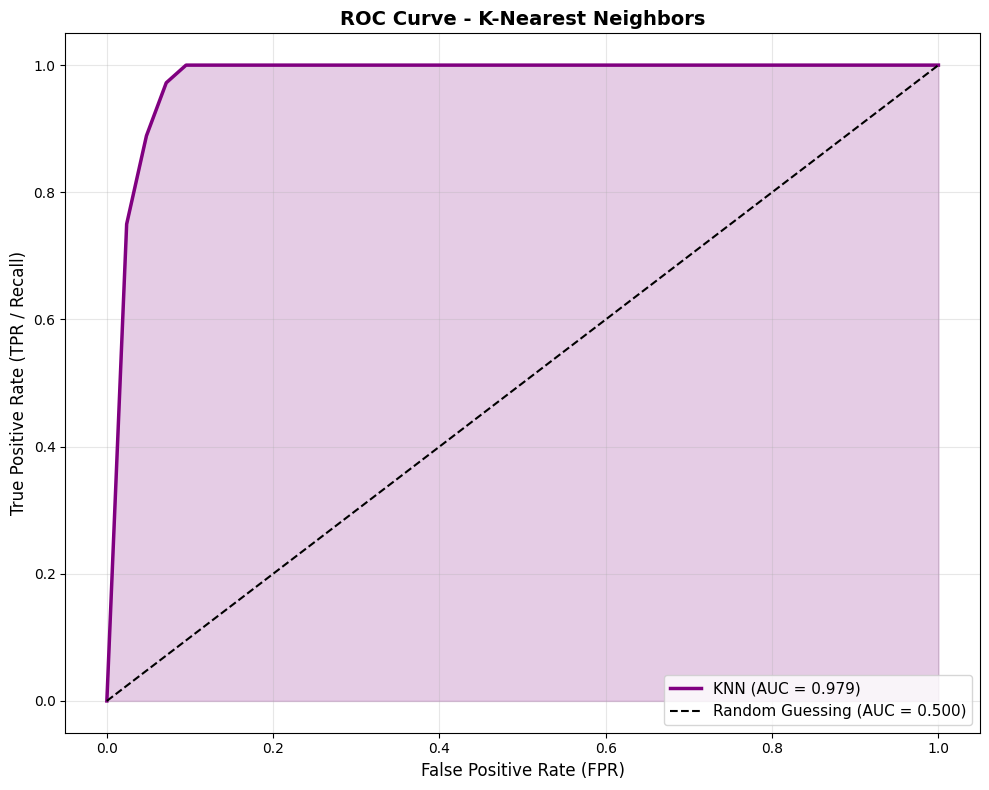

In [177]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc:.3f})',
         linewidth=2.5, color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.500)', linewidth=1.5)
plt.fill_between(fpr, tpr, alpha=0.2, color='purple')

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR / Recall)', fontsize=12)
plt.title('ROC Curve - K-Nearest Neighbors', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [178]:
print(classification_report(y_test, y_pred,
                          target_names=['Benign (0)', 'Malignant (1)'],
                          digits=4))

               precision    recall  f1-score   support

   Benign (0)     0.9512    0.9286    0.9398        42
Malignant (1)     0.9589    0.9722    0.9655        72

     accuracy                         0.9561       114
    macro avg     0.9551    0.9504    0.9526       114
 weighted avg     0.9561    0.9561    0.9560       114



In [179]:
k_values = [1, 3, 5, 7, 9, 11, 15, 20, 30, 50]
train_scores = []
test_scores = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn_temp.fit(X_train_scaled, y_train)

    train_score = knn_temp.score(X_train_scaled, y_train)
    test_score = knn_temp.score(X_test_scaled, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

    print(f"  K={k:2d}: Train accuracy = {train_score:.4f}, Test accuracy = {test_score:.4f}")

  K= 1: Train accuracy = 1.0000, Test accuracy = 0.9386
  K= 3: Train accuracy = 0.9780, Test accuracy = 0.9825
  K= 5: Train accuracy = 0.9736, Test accuracy = 0.9561
  K= 7: Train accuracy = 0.9758, Test accuracy = 0.9737
  K= 9: Train accuracy = 0.9736, Test accuracy = 0.9737
  K=11: Train accuracy = 0.9714, Test accuracy = 0.9737
  K=15: Train accuracy = 0.9692, Test accuracy = 0.9737
  K=20: Train accuracy = 0.9692, Test accuracy = 0.9737
  K=30: Train accuracy = 0.9582, Test accuracy = 0.9474
  K=50: Train accuracy = 0.9495, Test accuracy = 0.9474


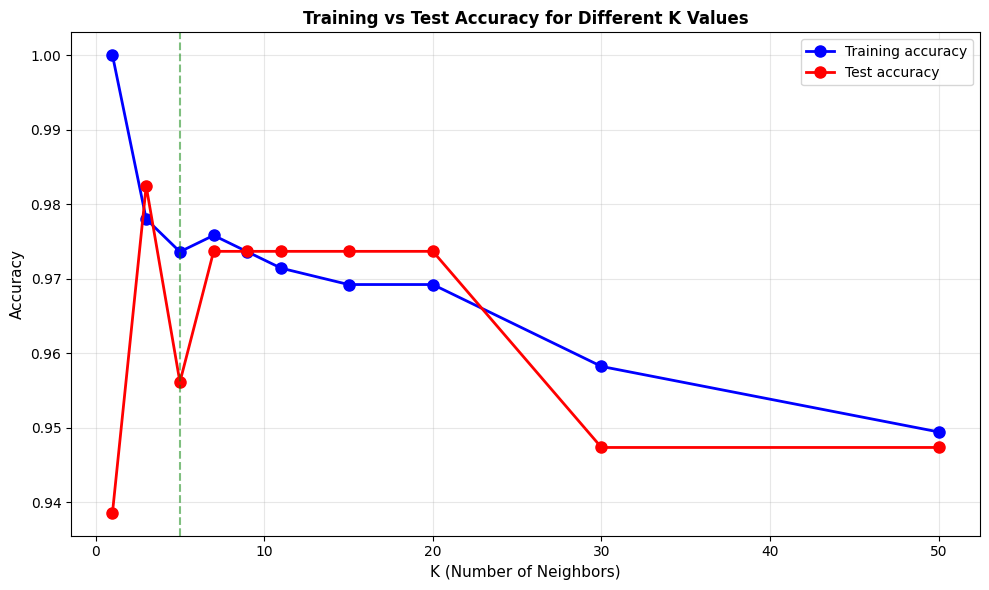

In [180]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, 'o-', linewidth=2, markersize=8, label='Training accuracy', color='blue')
plt.plot(k_values, test_scores, 'o-', linewidth=2, markersize=8, label='Test accuracy', color='red')

plt.xlabel('K (Number of Neighbors)', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.title('Training vs Test Accuracy for Different K Values', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.axvline(x=5, color='green', linestyle='--', alpha=0.5, label='Our choice: K=5')
plt.tight_layout()
plt.show()

In [181]:
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
metric_scores = []

for metric in metrics:
    knn_temp = KNeighborsClassifier(n_neighbors=5, metric=metric, n_jobs=-1)
    knn_temp.fit(X_train_scaled, y_train)
    test_score = knn_temp.score(X_test_scaled, y_test)
    metric_scores.append(test_score)

    print(f"  {metric:15s}: Test accuracy = {test_score:.4f}")

  euclidean      : Test accuracy = 0.9561
  manhattan      : Test accuracy = 0.9649
  chebyshev      : Test accuracy = 0.9474
  minkowski      : Test accuracy = 0.9561


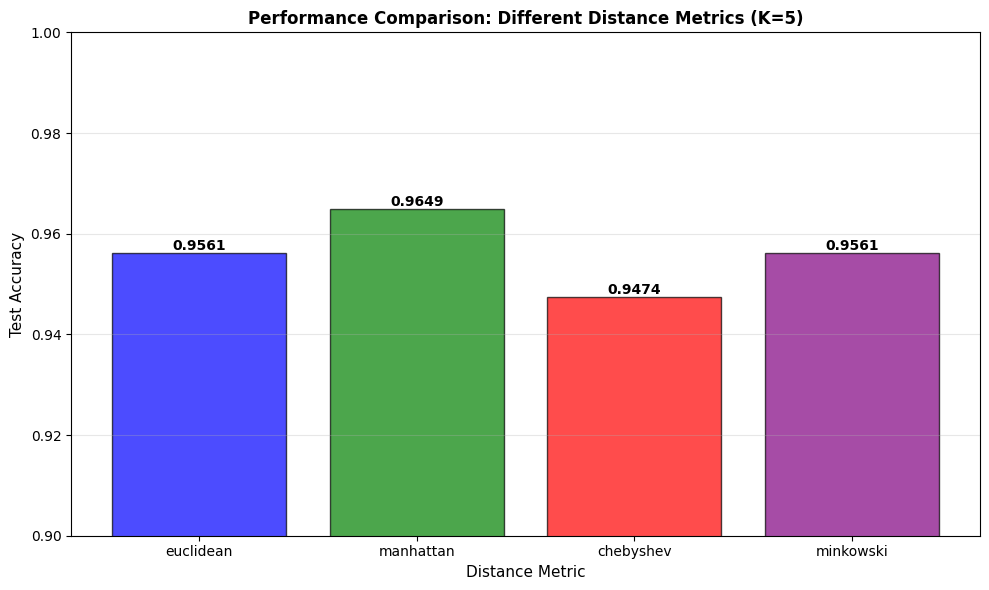

In [182]:
plt.figure(figsize=(10, 6))
colors_metrics = ['blue', 'green', 'red', 'purple']
bars = plt.bar(metrics, metric_scores, color=colors_metrics, alpha=0.7, edgecolor='black')
plt.ylabel('Test Accuracy', fontsize=11)
plt.xlabel('Distance Metric', fontsize=11)
plt.title('Performance Comparison: Different Distance Metrics (K=5)', fontsize=12, fontweight='bold')
plt.ylim([0.9, 1.0])
plt.grid(axis='y', alpha=0.3)

for bar, score in zip(bars, metric_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.4f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# **Neural Network**

In [187]:
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

np.random.seed(42)
tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"  BEFORE: mean={X_train[:, 0].mean():.2f}, std={X_train[:, 0].std():.2f}")
print(f"  AFTER:  mean={X_train_scaled[:, 0].mean():.2f}, std={X_train_scaled[:, 0].std():.2f}")

  BEFORE: mean=14.07, std=3.50
  AFTER:  mean=-0.00, std=1.00


In [184]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(30,), name='hidden_layer_1'),
    layers.Dropout(0.3, name='dropout_1'),  # Randomly drop 30% neurons (prevent overfitting)

    layers.Dense(32, activation='relu', name='hidden_layer_2'),
    layers.Dropout(0.2, name='dropout_2'),  # Randomly drop 20% neurons

    layers.Dense(1, activation='sigmoid', name='output_layer')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

In [188]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.000007,
    verbose=1
)

In [189]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)


print(f"Training details:")
print(f"Total epochs trained: {len(history.history['loss'])}")
print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final training loss: {history.history['loss'][-1]:.4f}")
print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")




Epoch 85: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 96: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 106: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 106: early stopping
Restoring model weights from the end of the best epoch: 86.
Training details:
Total epochs trained: 106
Final training accuracy: 0.9973
Final validation accuracy: 0.9890
Final training loss: 0.0094
Final validation loss: 0.0186


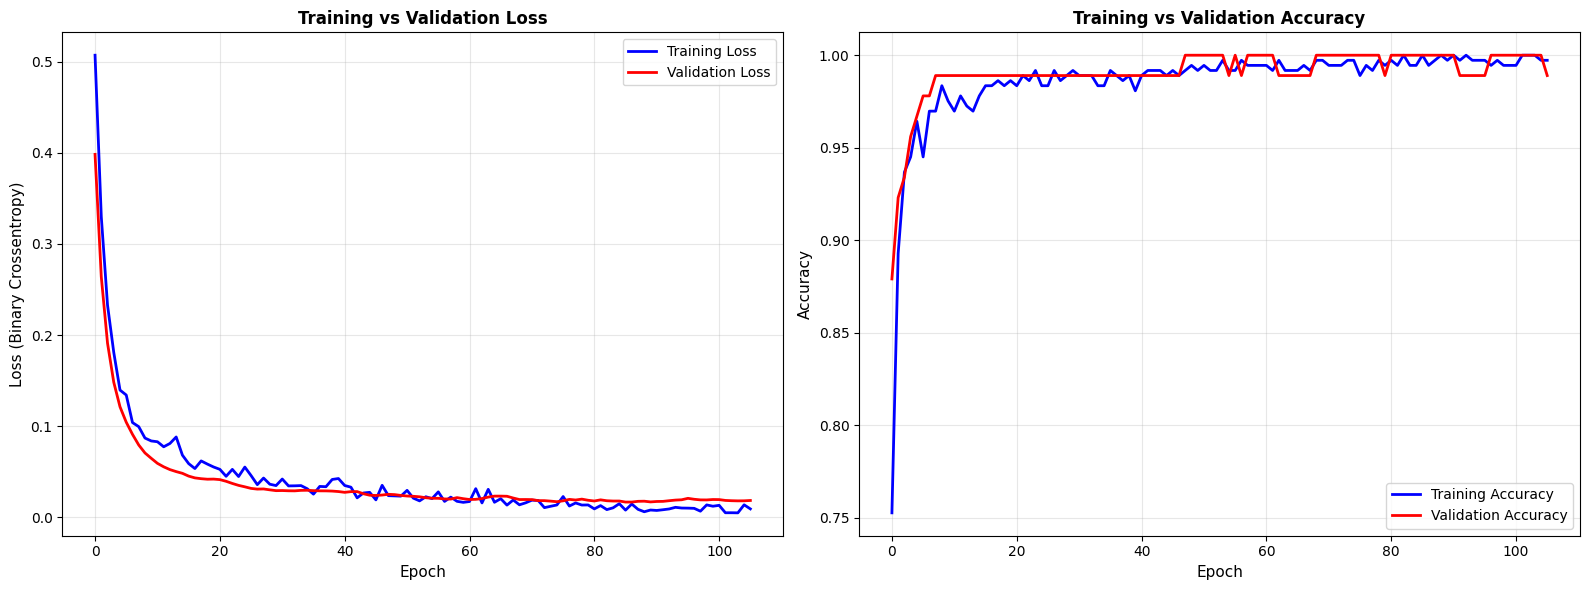

In [190]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(history.history['loss'], label='Training Loss', linewidth=2, color='blue')
ax1.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='red')
ax1.set_xlabel('Epoch', fontsize=11)
ax1.set_ylabel('Loss (Binary Crossentropy)', fontsize=11)
ax1.set_title('Training vs Validation Loss', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)

ax2.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, color='blue')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='red')
ax2.set_xlabel('Epoch', fontsize=11)
ax2.set_ylabel('Accuracy', fontsize=11)
ax2.set_title('Training vs Validation Accuracy', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [192]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
gap = final_train_acc - final_val_acc

print()
if gap < 0.02:
    print(f"Good fit. Gap = {gap:.4f} (< 2%)")
elif gap < 0.05:
    print(f"Slight overfitting. Gap = {gap:.4f} (2-5%)")
else:
    print(f"Overfitting detected. Gap = {gap:.4f} (> 5%)")


Good fit. Gap = 0.0082 (< 2%)


In [194]:
y_pred_proba = model.predict(X_test_scaled, verbose=0).flatten()
y_pred = (y_pred_proba >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}")

print(f"\nModel correctly classifies {accuracy*100:.1f}% of cases")
print(f"\nOf predicted as malignant, {precision*100:.1f}% are actually malignant")
print(f"\nOf actual malignant cases, model detects {recall*100:.1f}%")


Accuracy:  0.9561 (95.61%)
Precision: 0.9855 (98.55%)
Recall:    0.9444 (94.44%)
F1-Score:  0.9645
AUC:       0.9937

Model correctly classifies 95.6% of cases

Of predicted as malignant, 98.6% are actually malignant

Of actual malignant cases, model detects 94.4%


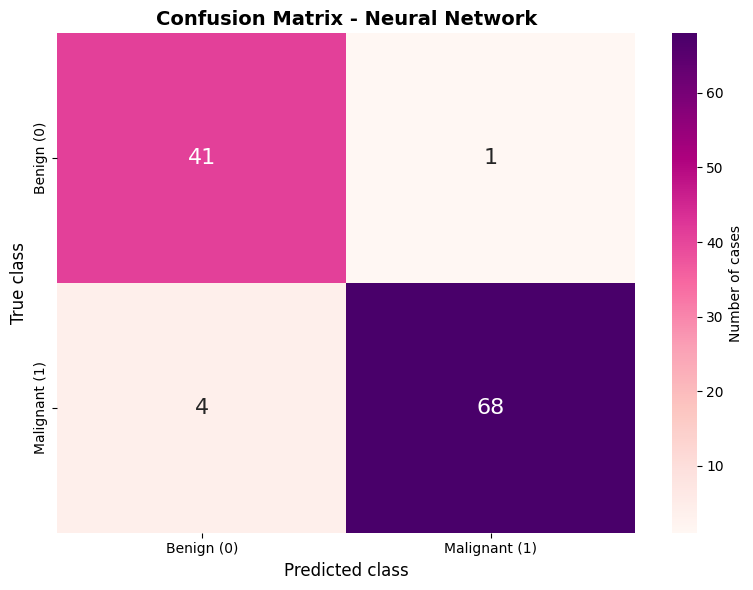

In [195]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'],
            cbar_kws={'label': 'Number of cases'},
            annot_kws={'size': 16})
plt.title('Confusion Matrix - Neural Network', fontsize=14, fontweight='bold')
plt.ylabel('True class', fontsize=12)
plt.xlabel('Predicted class', fontsize=12)
plt.tight_layout()
plt.show()

In [196]:
print(f"True Negatives (TN):   {tn:3d} - Correctly identified BENIGN")
print(f"False Positives (FP):  {fp:3d} - Benign wrongly as MALIGNANT (false alarm)")
print(f"False Negatives (FN):  {fn:3d} - Malignant wrongly as BENIGN (missed cancer)")
print(f"True Positives (TP):   {tp:3d} - Correctly identified MALIGNANT")

True Negatives (TN):    41 - Correctly identified BENIGN
False Positives (FP):    1 - Benign wrongly as MALIGNANT (false alarm)
False Negatives (FN):    4 - Malignant wrongly as BENIGN (missed cancer)
True Positives (TP):    68 - Correctly identified MALIGNANT


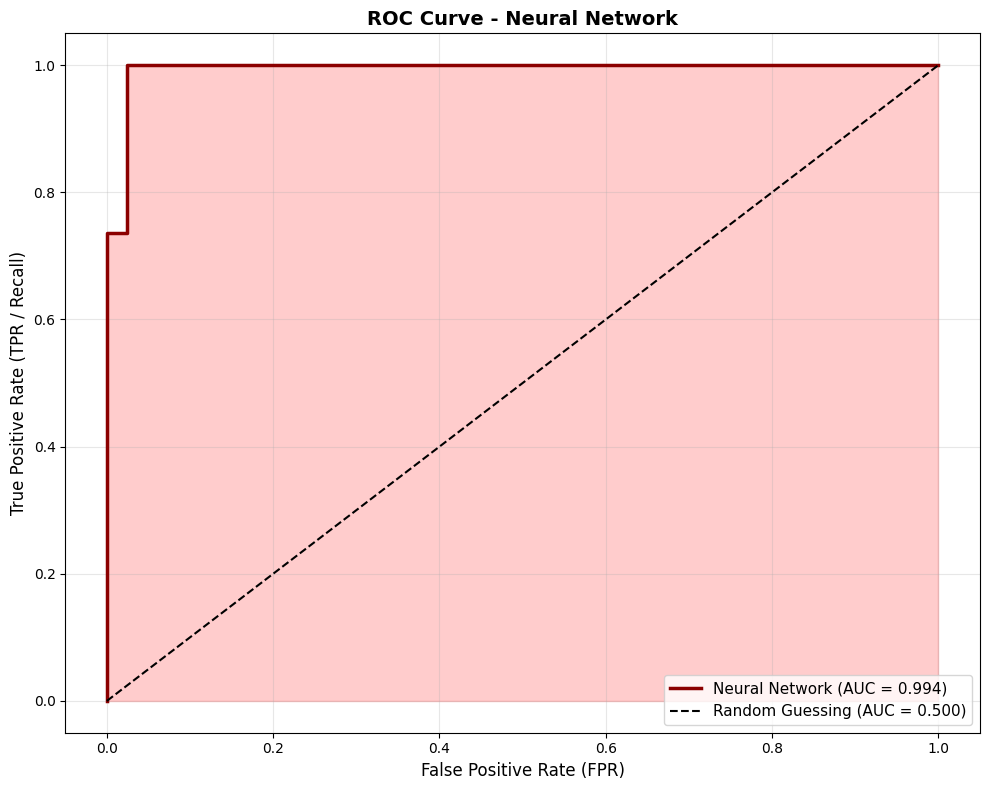

In [197]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {auc:.3f})',
         linewidth=2.5, color='darkred')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.500)', linewidth=1.5)
plt.fill_between(fpr, tpr, alpha=0.2, color='red')

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR / Recall)', fontsize=12)
plt.title('ROC Curve - Neural Network', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [198]:
print(classification_report(y_test, y_pred,
                          target_names=['Benign (0)', 'Malignant (1)'],
                          digits=4))

               precision    recall  f1-score   support

   Benign (0)     0.9111    0.9762    0.9425        42
Malignant (1)     0.9855    0.9444    0.9645        72

     accuracy                         0.9561       114
    macro avg     0.9483    0.9603    0.9535       114
 weighted avg     0.9581    0.9561    0.9564       114



In [200]:
new_patient = X_test_scaled[0].reshape(1, -1)
true_diagnosis = y_test[0]

probability = model.predict(new_patient, verbose=0)[0][0]
prediction = 1 if probability >= 0.5 else 0

print(f"True diagnosis: {'MALIGNANT' if true_diagnosis == 1 else 'BENIGN'}")
print(f"Prediction: {'MALIGNANT' if prediction == 1 else 'BENIGN'}")
print(f"Confidence: {max(probability, 1-probability)*100:.1f}%")
print(f"Result: {'✓ CORRECT' if prediction == true_diagnosis else '✗ INCORRECT'}")

True diagnosis: BENIGN
Prediction: BENIGN
Confidence: 100.0%
Result: ✓ CORRECT


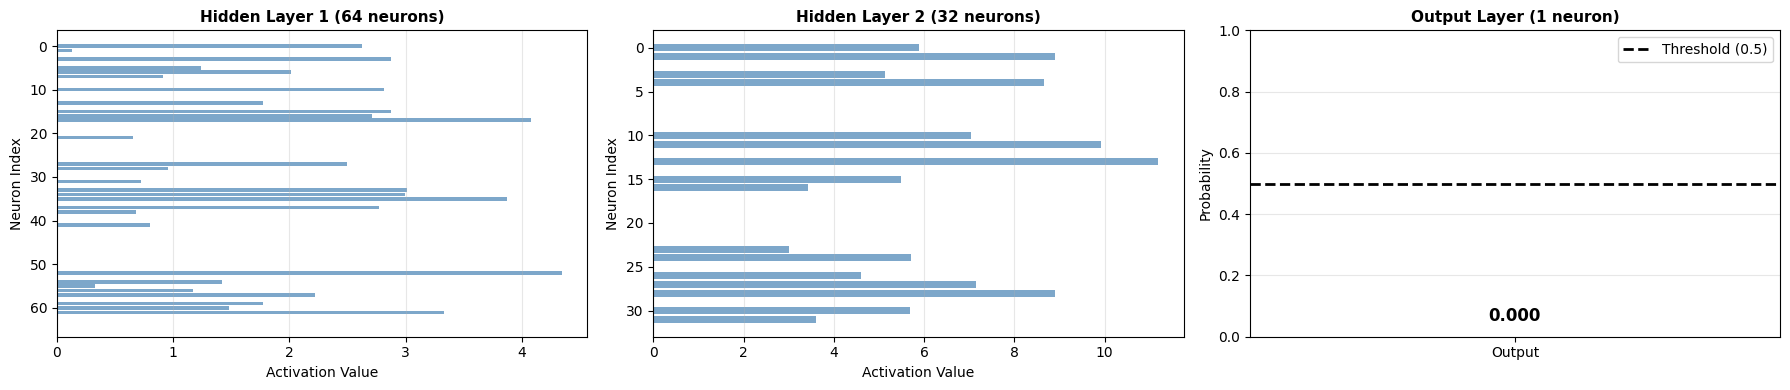

In [203]:
hidden1_model = models.Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
hidden2_model = models.Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
output_model = model

activation_hidden1 = hidden1_model.predict(new_patient, verbose=0)
activation_hidden2 = hidden2_model.predict(new_patient, verbose=0)
activation_output = output_model.predict(new_patient, verbose=0)

activations = [activation_hidden1, activation_hidden2, activation_output]

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

layer_names = ['Hidden Layer 1 (64 neurons)', 'Hidden Layer 2 (32 neurons)', 'Output Layer (1 neuron)']


for i, (activation, ax, name) in enumerate(zip(activations, axes, layer_names)):
    if i < 2:  # Hidden layers
        ax.barh(range(len(activation[0])), activation[0], color='steelblue', alpha=0.7)
        ax.set_ylabel('Neuron Index', fontsize=10)
        ax.set_xlabel('Activation Value', fontsize=10)
        ax.set_title(name, fontsize=11, fontweight='bold')
        ax.grid(axis='x', alpha=0.3)
        ax.invert_yaxis()  # Higher neurons at top
    else:  # Output layer
        prob = activation[0][0]
        ax.bar(['Output'], [prob], color='red' if prob > 0.5 else 'blue', alpha=0.7, width=0.4)
        ax.set_ylabel('Probability', fontsize=10)
        ax.set_title(name, fontsize=11, fontweight='bold')
        ax.set_ylim([0, 1])
        ax.axhline(y=0.5, color='black', linestyle='--', linewidth=2, label='Threshold (0.5)')
        ax.text(0, prob + 0.05, f'{prob:.3f}', ha='center', fontsize=12, fontweight='bold')
        ax.legend()
        ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Shape of weights: (30, 64)
Shape of biases: (64,)
Neuron 21 weights: [ 0.07096832  0.17014709  0.1243747  -0.27715212  0.2225416  -0.09242534
 -0.01983524 -0.18033727  0.03944365  0.08338874  0.17017889  0.01841359
 -0.01205608  0.18969643  0.10094569 -0.03365212 -0.08851567 -0.05707023
  0.1589449  -0.05123335  0.1853097   0.16153045 -0.20581141  0.01358795
 -0.07995322  0.2557037  -0.2612022   0.17336087 -0.21690734 -0.07700896]
Neuron 21 bias: -0.08058170974254608


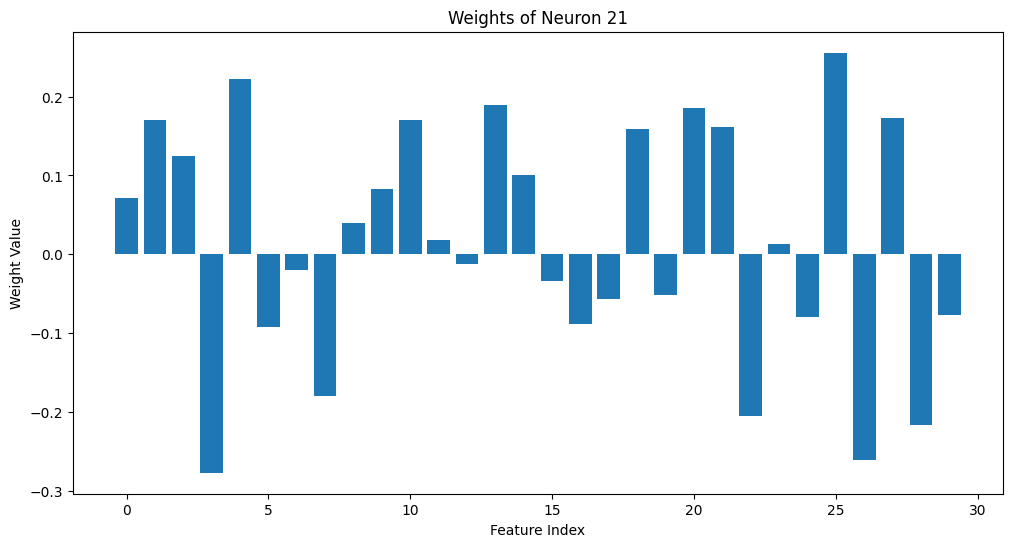

In [205]:
weights, biases = model.layers[0].get_weights()

print(f"Shape of weights: {weights.shape}")  # (30, 64)
print(f"Shape of biases: {biases.shape}")    # (64,)

print(f"Neuron 21 weights: {weights[:, 21]}")
print(f"Neuron 21 bias: {biases[21]}")

plt.figure(figsize=(12, 6))
plt.bar(range(30), weights[:, 21])
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.title('Weights of Neuron 21')
plt.show()

# **Podsumowanie**

In [209]:
results_data = {
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'K-Nearest Neighbors',
        'Neural Network'
    ],
    'Accuracy': [0.9825, 0.9474, 0.9561, 0.9561, 0.9561],
    'Precision': [0.9861, 0.9583, 0.9589, 0.9589, 0.9855],
    'Recall': [0.9861, 0.9583, 0.9722, 0.9722, 0.9444],
    'F1-Score': [0.9861, 0.9583, 0.9655, 0.9655, 0.9645],
    'AUC': [0.9954, 0.9679, 0.9934, 0.9788, 0.9937]
}

df_results = pd.DataFrame(results_data)
print(df_results.to_string(index=False))

              Model  Accuracy  Precision  Recall  F1-Score    AUC
Logistic Regression    0.9825     0.9861  0.9861    0.9861 0.9954
      Decision Tree    0.9474     0.9583  0.9583    0.9583 0.9679
      Random Forest    0.9561     0.9589  0.9722    0.9655 0.9934
K-Nearest Neighbors    0.9561     0.9589  0.9722    0.9655 0.9788
     Neural Network    0.9561     0.9855  0.9444    0.9645 0.9937


In [211]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

print("\nBest model for each metric:")
for metric in metrics:
    best_idx = df_results[metric].idxmax()
    best_model = df_results.loc[best_idx, 'Model']
    best_value = df_results.loc[best_idx, metric]
    print(f"  {metric:12s}: {best_model:25s} ({best_value:.4f})")

df_results['Average'] = df_results[metrics].mean(axis=1)
df_ranked = df_results.sort_values('Average', ascending=False)

print(f"\n{'Rank':<6} {'Model':<25} {'Avg Score':<12} {'Best At'}")

for rank, (idx, row) in enumerate(df_ranked.iterrows(), 1):
    model = row['Model']
    avg_score = row['Average']

    # Find what this model is best at
    best_metrics = []
    for metric in metrics:
        if df_results[metric].max() == row[metric]:
            best_metrics.append(metric)

    best_at = ", ".join(best_metrics) if best_metrics else "-"

    if rank == 1:
        symbol = "🥇"
    elif rank == 2:
        symbol = "🥈"
    elif rank == 3:
        symbol = "🥉"
    else:
        symbol = "  "

    print(f"{symbol} #{rank:<4} {model:<25} {avg_score:.4f}       {best_at}")



Best model for each metric:
  Accuracy    : Logistic Regression       (0.9825)
  Precision   : Logistic Regression       (0.9861)
  Recall      : Logistic Regression       (0.9861)
  F1-Score    : Logistic Regression       (0.9861)
  AUC         : Logistic Regression       (0.9954)

Rank   Model                     Avg Score    Best At
🥇 #1    Logistic Regression       0.9872       Accuracy, Precision, Recall, F1-Score, AUC
🥈 #2    Random Forest             0.9692       -
🥉 #3    Neural Network            0.9688       -
   #4    K-Nearest Neighbors       0.9663       -
   #5    Decision Tree             0.9580       -


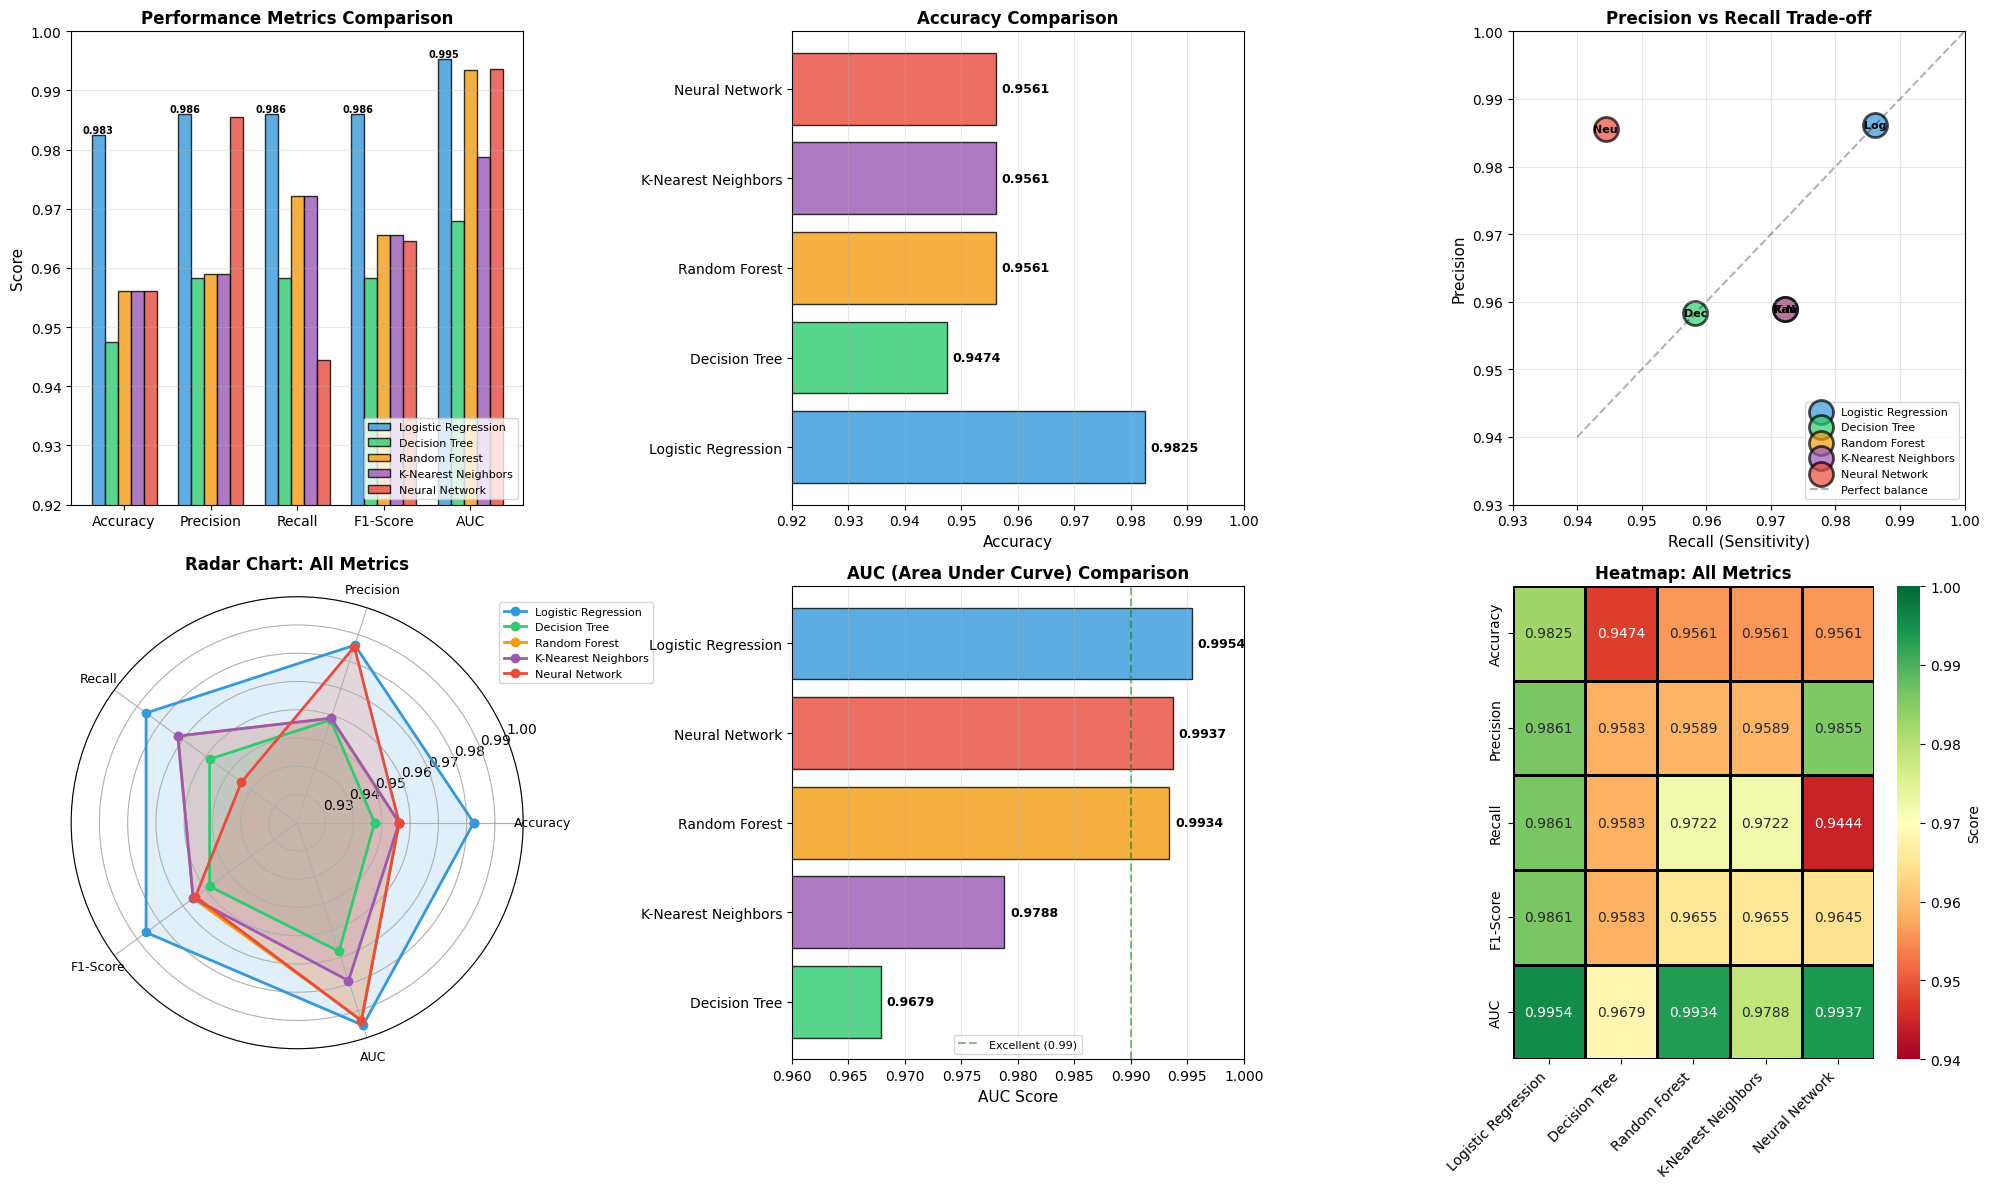

In [212]:
fig = plt.figure(figsize=(20, 12))

colors = ['#3498db', '#2ecc71', '#f39c12', '#9b59b6', '#e74c3c']
model_colors = dict(zip(df_results['Model'], colors))

ax1 = plt.subplot(2, 3, 1)
x = np.arange(len(metrics))
width = 0.15

for i, (idx, row) in enumerate(df_results.iterrows()):
    values = [row[metric] for metric in metrics]
    offset = width * (i - 2)
    bars = ax1.bar(x + offset, values, width, label=row['Model'],
                   color=colors[i], alpha=0.8, edgecolor='black')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if height == max([df_results.iloc[j][metrics[list(bars).index(bar)]]
                         for j in range(len(df_results))]):
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom', fontsize=7, weight='bold')

ax1.set_ylabel('Score', fontsize=11)
ax1.set_title('Performance Metrics Comparison', fontsize=12, weight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics, fontsize=10)
ax1.legend(fontsize=8, loc='lower right')
ax1.set_ylim([0.92, 1.0])
ax1.grid(axis='y', alpha=0.3)

ax2 = plt.subplot(2, 3, 2)
bars = ax2.barh(df_results['Model'], df_results['Accuracy'],
                color=colors, alpha=0.8, edgecolor='black')
ax2.set_xlabel('Accuracy', fontsize=11)
ax2.set_title('Accuracy Comparison', fontsize=12, weight='bold')
ax2.set_xlim([0.92, 1.0])
ax2.grid(axis='x', alpha=0.3)

for i, (bar, acc) in enumerate(zip(bars, df_results['Accuracy'])):
    ax2.text(acc + 0.001, bar.get_y() + bar.get_height()/2,
            f'{acc:.4f}',
            va='center', fontsize=9, weight='bold')

# Plot 3: Precision vs Recall
ax3 = plt.subplot(2, 3, 3)
for idx, row in df_results.iterrows():
    ax3.scatter(row['Recall'], row['Precision'],
               s=300, color=colors[idx], alpha=0.7,
               edgecolors='black', linewidth=2,
               label=row['Model'])
    ax3.text(row['Recall'], row['Precision'],
            row['Model'][:3],
            ha='center', va='center', fontsize=8, weight='bold')

ax3.set_xlabel('Recall (Sensitivity)', fontsize=11)
ax3.set_ylabel('Precision', fontsize=11)
ax3.set_title('Precision vs Recall Trade-off', fontsize=12, weight='bold')
ax3.plot([0.94, 1], [0.94, 1], 'k--', alpha=0.3, label='Perfect balance')
ax3.set_xlim([0.93, 1.0])
ax3.set_ylim([0.93, 1.0])
ax3.legend(fontsize=8, loc='lower right')
ax3.grid(alpha=0.3)

ax4 = plt.subplot(2, 3, 4, projection='polar')

categories = metrics
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

for idx, row in df_results.iterrows():
    values = [row[metric] for metric in metrics]
    values += values[:1]  # Complete the circle

    ax4.plot(angles, values, 'o-', linewidth=2,
            label=row['Model'], color=colors[idx])
    ax4.fill(angles, values, alpha=0.15, color=colors[idx])

ax4.set_xticks(angles[:-1])
ax4.set_xticklabels(categories, fontsize=9)
ax4.set_ylim(0.92, 1.0)
ax4.set_title('Radar Chart: All Metrics', fontsize=12, weight='bold', pad=20)
ax4.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=8)
ax4.grid(True)

ax5 = plt.subplot(2, 3, 5)
df_sorted = df_results.sort_values('AUC', ascending=True)
bars = ax5.barh(df_sorted['Model'], df_sorted['AUC'],
                color=[model_colors[m] for m in df_sorted['Model']],
                alpha=0.8, edgecolor='black')
ax5.set_xlabel('AUC Score', fontsize=11)
ax5.set_title('AUC (Area Under Curve) Comparison', fontsize=12, weight='bold')
ax5.set_xlim([0.96, 1.0])
ax5.axvline(x=0.99, color='green', linestyle='--', alpha=0.5, label='Excellent (0.99)')
ax5.legend(fontsize=8)
ax5.grid(axis='x', alpha=0.3)

for bar, auc in zip(bars, df_sorted['AUC']):
    ax5.text(auc + 0.0005, bar.get_y() + bar.get_height()/2,
            f'{auc:.4f}',
            va='center', fontsize=9, weight='bold')

ax6 = plt.subplot(2, 3, 6)
heatmap_data = df_results[metrics].T
sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='RdYlGn',
           vmin=0.94, vmax=1.0, cbar_kws={'label': 'Score'},
           xticklabels=df_results['Model'], yticklabels=metrics,
           linewidths=1, linecolor='black', ax=ax6)
ax6.set_title('Heatmap: All Metrics', fontsize=12, weight='bold')
plt.setp(ax6.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.savefig('comprehensive_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

